In [ ]:
# install the package in google collab
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=69398aa7d582c80a7e1636c930e1141b2c3f5ba8560d8a3ea46ba2b32d27e6e1
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 15.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error
import plotly.graph_objs as go
from plotly.offline import iplot
import pycountry

In [ ]:
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (classification_report, f1_score,  recall_score,
                             roc_auc_score, balanced_accuracy_score)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# for a more in depth EDA
from ydata_profiling import ProfileReport



1.  Number of Contacts: Users with a larger number of contacts may be more engaged with the platform's social aspects and less likely to churn.
2.   Plan Type: Users on certain plans may be more likely to churn. Higher-tier plans might have more features, which could increase user retention.
3. Notification Preferences: Users who have opted out of marketing notifications (both push and email) may be less engaged with the platform and more likely to churn.
4. Transaction Activity: Users who have not made transactions recently may be more likely to churn. This could be inferred from the "transactions_state" column.
5. Geographic Location: Churn rates may vary based on the user's country, city, or even merchant location (ea_merchant_city, ea_merchant_country). Certain regions may have different economic conditions or competition from other financial service providers, influencing churn rates.
6. Usage of Crypto Feature: Users who have unlocked the crypto feature may be more engaged with the platform and less likely to churn.
7. Device type: Maybe users who use a certain device are more likely to be churn users.




# **1. STARTING EDA**

# **Users exploration**

In [ ]:
pwd

'/content'

In [ ]:
users = pd.read_csv("users.csv")
users.head()

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,0,0
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,NaN,NaN,75,0,0
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,NaN,NaN,71,0,0
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,STANDARD,NaN,NaN,219,0,0
4,user_4,1992,GB,London,2018-01-08 18:40:21.097856,0,STANDARD,NaN,NaN,0,0,0


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15544 entries, 0 to 15543
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   user_id                                   15544 non-null  object 
 1   birth_year                                15544 non-null  int64  
 2   country                                   15544 non-null  object 
 3   city                                      15544 non-null  object 
 4   created_date                              15544 non-null  object 
 5   user_settings_crypto_unlocked             15544 non-null  int64  
 6   plan                                      15544 non-null  object 
 7   attributes_notifications_marketing_push   10284 non-null  float64
 8   attributes_notifications_marketing_email  10284 non-null  float64
 9   num_contacts                              15544 non-null  int64  
 10  num_referrals                     

In [ ]:
number_columns = users.select_dtypes(include=['int64', 'float64'])
number_columns.mean()

birth_year                                  1983.666624
user_settings_crypto_unlocked                  0.182385
attributes_notifications_marketing_push        0.948269
attributes_notifications_marketing_email       0.895469
num_contacts                                  17.874228
num_referrals                                  0.000000
num_successful_referrals                       0.000000
dtype: float64

In [ ]:
# Notice that created_date is type object, lets convert it
users['created_date'] = pd.to_datetime(users['created_date'])
print('The last created user was {} and the first {}'.format(users['created_date'].max(), users['created_date'].min()))

The last created user was 2019-01-03 07:34:36.638892 and the first 2018-01-01 08:42:24.799709


In [ ]:
# adding describe for a quick EDA, notice the num_referrals & num_successful_referrals column are 0 for mean, min, max meaning they have no values
users.describe()

,birth_year,created_date,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
count,15544.000000,15544,15544.000000,10284.000000,10284.000000,15544.000000,15544.0,15544.0
mean,1983.666624,2018-07-23 15:06:30.181476608,0.182385,0.948269,0.895469,17.874228,0.0,0.0
min,1929.000000,2018-01-01 08:42:24.799709,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1977.000000,2018-04-28 15:23:27.907645952,0.000000,1.000000,1.000000,0.000000,0.0,0.0
50%,1986.000000,2018-08-01 20:15:49.682771456,0.000000,1.000000,1.000000,5.000000,0.0,0.0
75%,1992.000000,2018-10-23 05:24:22.228233984,0.000000,1.000000,1.000000,19.000000,0.0,0.0
max,2001.000000,2019-01-03 07:34:36.638892,1.000000,1.000000,1.000000,2918.000000,0.0,0.0
std,11.369184,NaN,0.386174,0.221494,0.305963,47.549929,0.0,0.0


In [ ]:
#The plans are three: GOLD the best and Standard the worst
distinct_plan = users['plan'].unique()
print(distinct_plan)

['STANDARD' 'GOLD' 'SILVER']


In [ ]:
distinct_user_settings_crypto_unlocked = users['user_settings_crypto_unlocked'].unique()
print("Unique user_settings_crypto_unlocked: {}".format(distinct_user_settings_crypto_unlocked))

distinct_attributes_notifications_marketing_push = users['attributes_notifications_marketing_push'].unique()
print("Unique attributes_notifications_marketing_push: {}".format(distinct_attributes_notifications_marketing_push))

distinct_attributes_notifications_marketing_email = users['attributes_notifications_marketing_email'].unique()
print("Unique attributes_notifications_marketing_email: {}".format(distinct_attributes_notifications_marketing_email))

distinct_num_referrals = users['num_referrals'].unique()
print("Unique num_referrals: {}".format(distinct_num_referrals))

distinct_num_successful_referrals = users['num_successful_referrals'].unique()
print("Unique num_successful_referrals: {}".format(distinct_num_successful_referrals))

#num_referrals and num_succeddful_referrals are all 0 so we can drop these two columns as they do not give us any information to distinguish churn users

Unique user_settings_crypto_unlocked: [0 1]
Unique attributes_notifications_marketing_push: [ 1. nan  0.]
Unique attributes_notifications_marketing_email: [ 1. nan  0.]
Unique num_referrals: [0]
Unique num_successful_referrals: [0]


In [ ]:
distinct_country = users['country'].unique()
print(distinct_country)

['ES' 'LT' 'IE' 'GB' 'MT' 'FR' 'RO' 'PL' 'AT' 'IT' 'SI' 'CZ' 'BE' 'BG'
 'GI' 'CH' 'GG' 'CY' 'LV' 'DE' 'SK' 'GR' 'DK' 'PT' 'LU' 'HR' 'NL' 'NO'
 'SE' 'AU' 'IM' 'FI' 'EE' 'JE' 'HU' 'RE' 'IS' 'GP' 'LI' 'MQ']


In [ ]:
distinct_city = users['city'].unique()
print(distinct_city)

['Madrid' 'Klaipeda' 'Carrickmacross' ... 'Schilde' 'Bralin' 'Andover']


In [ ]:
print('The oldest user was born in {} and the youngest {}'.format(users['birth_year'].min(), users['birth_year'].max()))

The oldest user was born in 1929 and the youngest 2001


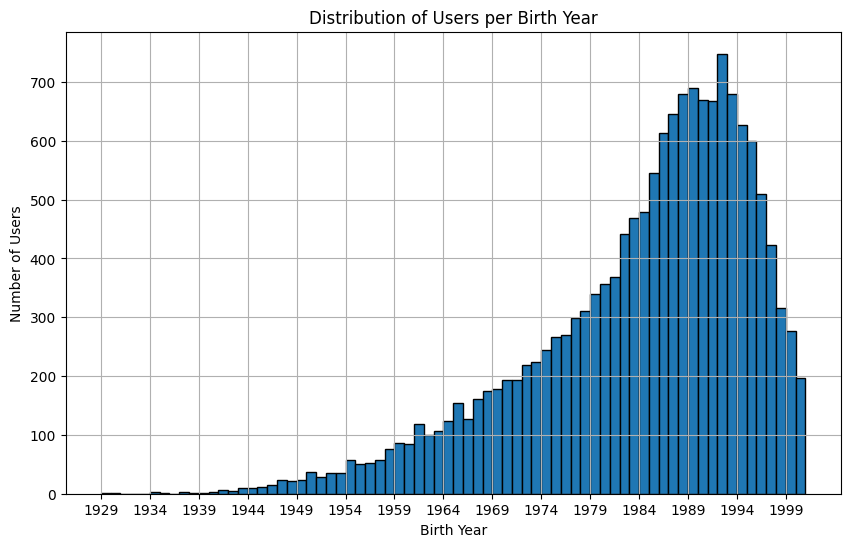

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(users['birth_year'], bins=range(users['birth_year'].min(), users['birth_year'].max() + 1), edgecolor='black')
plt.title('Distribution of Users per Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Number of Users')
plt.xticks(range(users['birth_year'].min(), users['birth_year'].max() + 1, 5))  # Set the step to 5 for example
plt.grid(True)
plt.show()

In [ ]:
# Check for missing values-attributes_notifications_marketing_push and attributes_notifications_marketing_email have many null values
print(users.isnull().sum())

user_id                                        0
birth_year                                     0
country                                        0
city                                           0
created_date                                   0
user_settings_crypto_unlocked                  0
plan                                           0
attributes_notifications_marketing_push     5260
attributes_notifications_marketing_email    5260
num_contacts                                   0
num_referrals                                  0
num_successful_referrals                       0
dtype: int64


The below plot is to check outliers. num_contacts has a lot of outliers with the highest number being 3000. This could be real so I will not remove the outliers.

<Axes: >

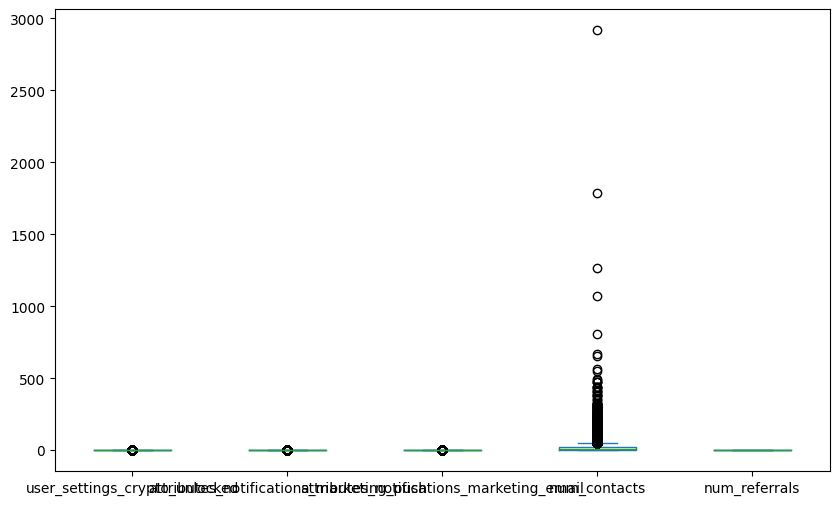

In [ ]:
users.iloc[:, 3:11].plot.box(figsize=(10,6))

In [ ]:
users_filtered = users.drop(columns=['num_successful_referrals', 'num_referrals'])

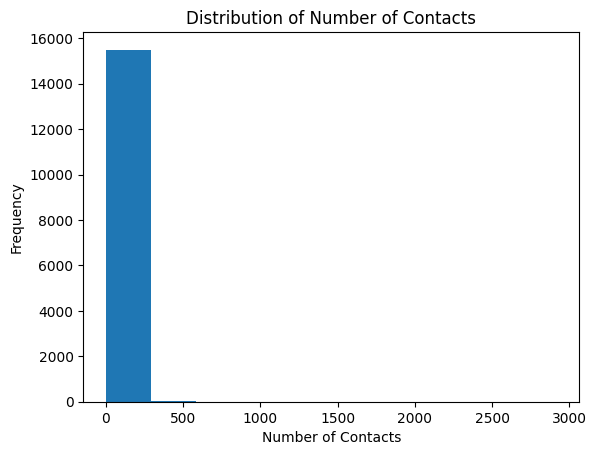

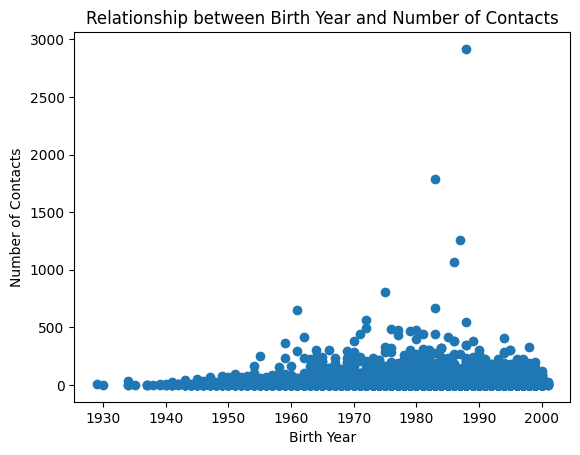

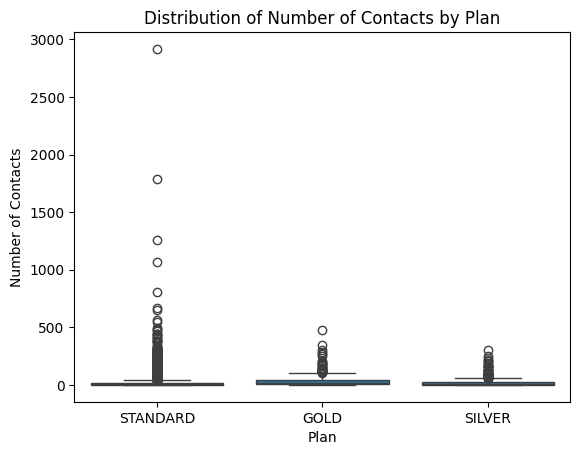

In [ ]:
# Histogram of a numerical column
plt.hist(users_filtered['num_contacts'])
plt.xlabel('Number of Contacts')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Contacts')
plt.show()

# Scatter plot of two numerical columns
plt.scatter(users_filtered['birth_year'], users_filtered['num_contacts'])
plt.xlabel('Birth Year')
plt.ylabel('Number of Contacts')
plt.title('Relationship between Birth Year and Number of Contacts')
plt.show()

# Box plot of a numerical column grouped by a categorical column
sns.boxplot(x='plan', y='num_contacts', data=users_filtered)
plt.xlabel('Plan')
plt.ylabel('Number of Contacts')
plt.title('Distribution of Number of Contacts by Plan')
plt.show()

In [ ]:
# correlations between user characteristics after dropping num_referrals & num_successful_referrals

users_filtered.corr(numeric_only = True)

,birth_year,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts
birth_year,1.000000,0.066267,0.030353,-0.021766,0.023119
user_settings_crypto_unlocked,0.066267,1.000000,0.011729,0.040860,0.032832
attributes_notifications_marketing_push,0.030353,0.011729,1.000000,0.591775,0.008085
attributes_notifications_marketing_email,-0.021766,0.040860,0.591775,1.000000,0.024525
num_contacts,0.023119,0.032832,0.008085,0.024525,1.000000


<Axes: >

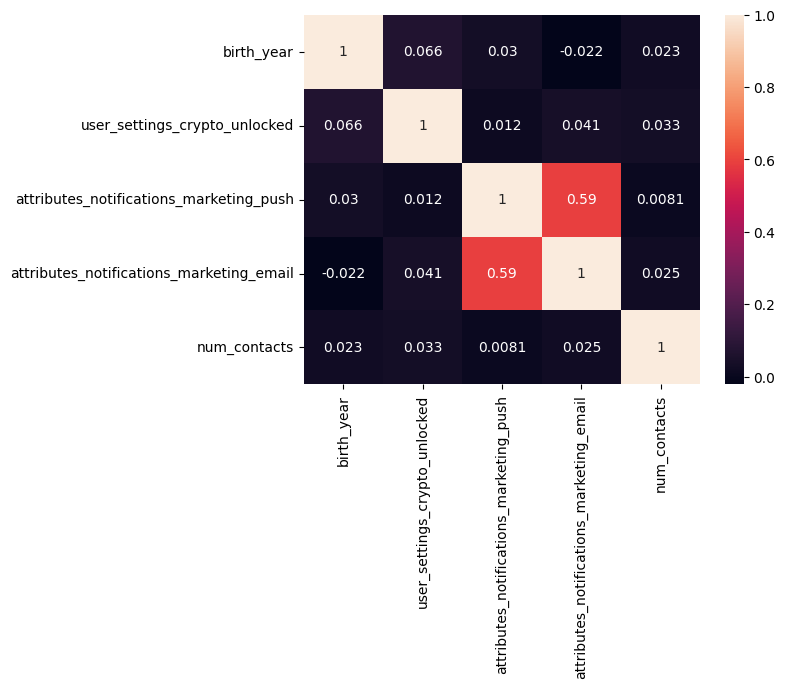

In [ ]:
sns.heatmap(users_filtered.corr(numeric_only = True),annot=True)

Weak correlations overall; somewhat medium correlation between marketing_push and marketing_email which makes intuitive sense as opting in for push will most likely opt in for email and vice versa. This could be because for instant the opting in for push / email are on the same screen, so users at that time can select either medium for opting in.

In [ ]:
# examine profile report
profile_users = ProfileReport(users_filtered, title = "Users Filtered Report")

In [ ]:
profile_users

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print("Summary of EDA")
print(" ")
print("1. High EU country presence with UK being #1 (1/3 users from there), and top 5 being in the EU")
print(" ")
print(users_filtered['country'].value_counts().head())
print(" ")
print("2. Regarding City, London (7.5% of users), Paris, Dublin, Warsaw and Bucharest are amongst top 5")
print(users_filtered['city'].value_counts().head())
print(" ")
print("3. User crypto setting highly unbalanced with only 18% having activated the feature")
print(" ")
print("4. User plan highly unbalanced with 93% belonging to the standard plan.")
print(" ")
print("5. Marketing push and marketing email have a high number of missing values. We will need to see how we can treat them during preprocessing")
print(" ")



Summary of EDA
 
1. High EU country presence with UK being #1 (1/3 users from there), and top 5 being in the EU
 
country
GB    5018
PL    1834
FR    1696
IE     995
RO     873
Name: count, dtype: int64
 
2. Regarding City, London (7.5% of users), Paris, Dublin, Warsaw and Bucharest are amongst top 5
city
London      1342
Warszawa     330
Paris        292
Dublin       286
Vilnius      271
Name: count, dtype: int64
 
3. User crypto setting highly unbalanced with only 18% having activated the feature
 
4. User plan highly unbalanced with 93% belonging to the standard plan
 
5. Marketing push and marketing email have a high number of missing values. We will need to see how we can treat them during preprocessing
 


# **Transactions exploration**

In [ ]:
pwd

'/content'

In [ ]:
transactions = pd.read_csv("transactions.csv")
transactions.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-18 18:53:41.323032
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_2355,2019-03-22 14:20:01.513032
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_14318,2019-03-22 05:42:50.316652


In [ ]:
transactions.shape

(167567, 12)

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167567 entries, 0 to 167566
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   transaction_id         167567 non-null  object 
 1   transactions_type      167567 non-null  object 
 2   transactions_currency  167567 non-null  object 
 3   amount_usd             167567 non-null  float64
 4   transactions_state     167567 non-null  object 
 5   ea_cardholderpresence  103022 non-null  object 
 6   ea_merchant_mcc        104186 non-null  float64
 7   ea_merchant_city       104176 non-null  object 
 8   ea_merchant_country    104180 non-null  object 
 9   direction              167567 non-null  object 
 10  user_id                167567 non-null  object 
 11  created_date           167567 non-null  object 
dtypes: float64(2), object(10)
memory usage: 15.3+ MB


The users who have not made recent transactions may be a churn user.

In [ ]:
transactions['created_date'] = pd.to_datetime(transactions['created_date'])
print('The latest transaction was {} and the first {}'.format(transactions['created_date'].max(), transactions['created_date'].min()))

The latest transaction was 2019-05-16 18:22:16.959896 and the first 2018-01-01 08:51:10.248709


In [ ]:
number_columns = transactions.select_dtypes(include=['int64', 'float64'])
number_columns.describe()

,amount_usd,ea_merchant_mcc
count,1.431051e+06,832601.000000
mean,1.138192e+05,5701.589632
std,7.092146e+07,934.562157
min,0.000000e+00,742.000000
25%,2.130000e+00,5411.000000
50%,8.510000e+00,5812.000000
75%,2.979000e+01,5921.000000
max,7.464155e+10,9406.000000


In [ ]:
# ea_cardholderpresence, ea_merchant_mcc, ea_merchant_city, ea_merchant_country have null values
print(transactions.isnull().sum())

transaction_id               0
transactions_type            0
transactions_currency        0
amount_usd                   0
transactions_state           0
ea_cardholderpresence    64545
ea_merchant_mcc          63381
ea_merchant_city         63391
ea_merchant_country      63387
direction                    0
user_id                      0
created_date                 0
dtype: int64


In [ ]:
distinct_transactions_type = transactions['transactions_type'].unique()
print('transactions_type: {}'.format(distinct_transactions_type))

distinct_transactions_currency = transactions['transactions_currency'].unique()
print('transactions_currency: {}'.format(distinct_transactions_currency))

distinct_transactions_state = transactions['transactions_state'].unique()
print('transactions_state: {}'.format(distinct_transactions_state))

distinct_ea_cardholderpresence = transactions['ea_cardholderpresence'].unique()
print('ea_cardholderpresence: {}'.format(distinct_ea_cardholderpresence))

#This column contains the Merchant Category Code (MCC) for the merchant involved in the transaction. The MCC is a four-digit code used to classify merchants by their primary business activities.
distinct_ea_merchant_mcc = transactions['ea_merchant_mcc'].unique()
print('ea_merchant_mcc: {}'.format(distinct_ea_merchant_mcc))

distinct_ea_merchant_city = transactions['ea_merchant_city'].unique()
print('ea_merchant_city: {}'.format(distinct_ea_merchant_city))

distinct_ea_merchant_country = transactions['ea_merchant_country'].unique()
print('ea_merchant_country: {}'.format(distinct_ea_merchant_country))

distinct_direction = transactions['direction'].unique()
print('direction: {}'.format(distinct_direction))

transactions_type: ['TRANSFER' 'CARD_PAYMENT' 'EXCHANGE' 'ATM' 'CARD_REFUND' 'TOPUP' 'REFUND'
 'FEE' 'CASHBACK' 'TAX']
transactions_currency: ['AED' 'SEK' 'AUD' 'GBP' 'ETH' 'RUB' 'CHF' 'HRK' 'LTC' 'MAD' 'BTC' 'NZD'
 'JPY' 'ILS' 'QAR' 'MXN' 'DKK' 'SGD' 'ZAR' 'BGN' 'USD' 'INR' 'THB']
transactions_state: ['COMPLETED' 'REVERTED' 'DECLINED' 'PENDING' 'FAILED' 'CANCELLED']
ea_cardholderpresence: [nan 'FALSE' 'TRUE' 'UNKNOWN']
ea_merchant_mcc: [  nan 4111. 5814. 5651. 6513. 7011. 5541. 5331. 6011. 5977. 7278. 3583.
 5309. 4121. 5411. 3504. 3301. 7399. 5542. 5811. 5941. 4816. 7994. 5912.
 7999. 5813. 3512. 4722. 3640. 3520. 5947. 7230. 7832. 5311. 8999. 5812.
 5999. 7996. 3750. 3503. 4814. 7512. 3710. 7998. 3590. 5964. 7392. 5499.
 3612. 5655. 9399. 7523. 5441. 7933. 3641. 5047. 8299. 7221. 3513. 5691.
 7922. 4215. 7992. 5944. 8021. 5732. 5971. 5631. 4457. 5641. 5942. 8062.
 5945. 7941. 8099. 5948. 5621. 5611. 5451. 8043. 5462. 5399. 3831. 5712.
 4812. 4789. 7991. 5994. 5921.  780. 6012. 4112.

In [ ]:
# the thought process was initially to keep the columns and fill them with with the Value of UNKNOWN
# However these values are close to 50% of the column values
# We will proceed with removing these columns and keep a mental note to perhaps repeat in the future with UNKNOWN
transactions.drop(columns = ["ea_cardholderpresence","ea_merchant_mcc","ea_merchant_city","ea_merchant_country"],inplace=True)



In [ ]:
#transaction to be 0 seems wrong
print('The largest amount was {} and the smallest {}'.format(transactions['amount_usd'].max(), transactions['amount_usd'].min()))

The largest amount was 74641551593.26 and the smallest 0.0


In [ ]:
#it is weird that those transactions were completed but we look for churn users and transactions even with 0 dollars are important to identify churn users so we will not remove them.
print(transactions[(transactions['amount_usd'] == 0.0) & (transactions['transactions_state'] == 'COMPLETED')])

              transaction_id transactions_type transactions_currency  \
1975        transaction_1975          CASHBACK                   SEK   
2009        transaction_2009          CASHBACK                   SEK   
2028        transaction_2028          CASHBACK                   SEK   
2053        transaction_2053          CASHBACK                   SEK   
2056        transaction_2056          CASHBACK                   SEK   
...                      ...               ...                   ...   
2052782  transaction_2052782          CASHBACK                   RON   
2052794  transaction_2052794          CASHBACK                   RON   
2052875  transaction_2052875          CASHBACK                   RON   
2052902  transaction_2052902          CASHBACK                   RON   
2141141  transaction_2141141               FEE                   EUR   

         amount_usd transactions_state direction     user_id  \
1975            0.0          COMPLETED   INBOUND   user_5680   
2009   

<Axes: >

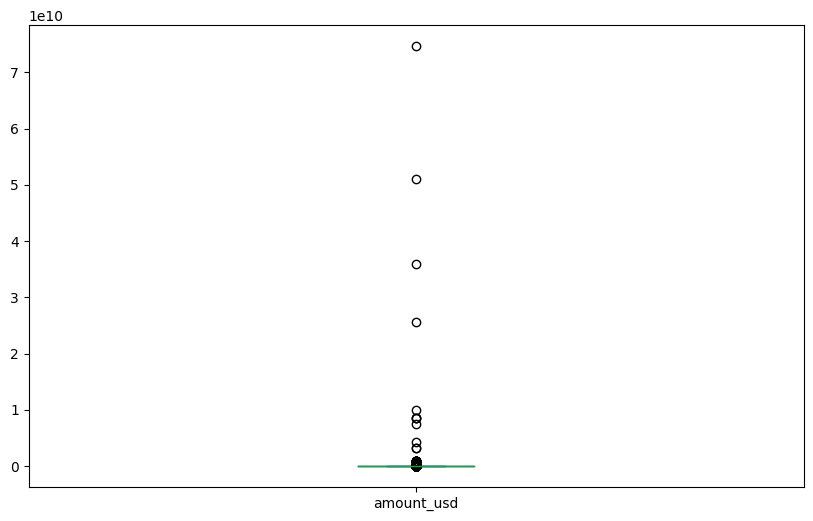

In [ ]:
# it seems unbelievable that one transaction was 74641551593.26 usd
transactions.iloc[:, 1:7].plot.box(figsize=(10,6))

In [ ]:
z_scores = np.abs(stats.zscore(transactions['amount_usd']))
threshold = 3
transactions = transactions[(z_scores < threshold)]

<Axes: >

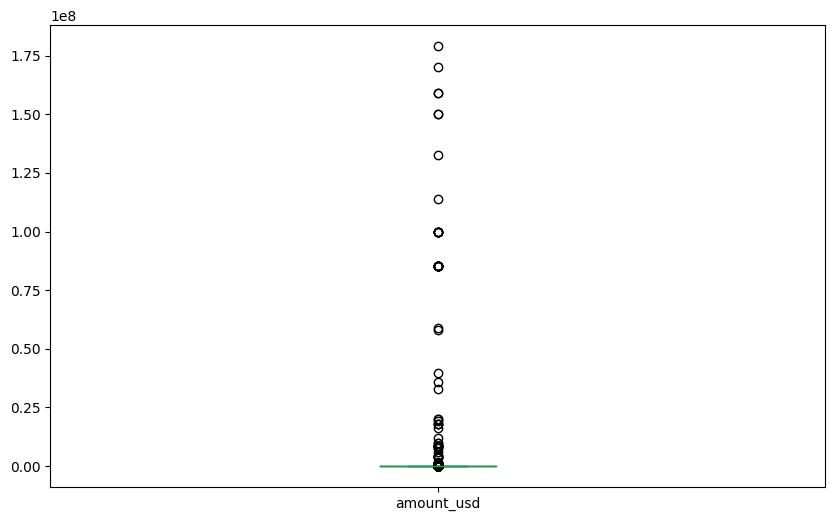

In [ ]:
transactions.iloc[:, 1:7].plot.box(figsize=(10,6))

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181026 entries, 0 to 2181025
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   transaction_id         object        
 1   transactions_type      object        
 2   transactions_currency  object        
 3   amount_usd             float64       
 4   transactions_state     object        
 5   direction              object        
 6   user_id                object        
 7   created_date           datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 133.1+ MB


In [ ]:
transactions.iloc[:,1:-2] # select all the transactions columns we want without having the transaction id, created date and user id

,transactions_type,transactions_currency,amount_usd,transactions_state,direction
0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND
1,CARD_PAYMENT,AED,15.50,COMPLETED,OUTBOUND
2,CARD_PAYMENT,AED,43.40,COMPLETED,OUTBOUND
3,TRANSFER,AED,10043.01,COMPLETED,OUTBOUND
4,CARD_PAYMENT,AED,43.81,COMPLETED,OUTBOUND
...,...,...,...,...,...
2181021,TOPUP,EUR,18.69,FAILED,INBOUND
2181022,TRANSFER,EUR,1.70,COMPLETED,OUTBOUND
2181023,TRANSFER,EUR,4.26,COMPLETED,OUTBOUND
2181024,TRANSFER,EUR,1.70,COMPLETED,OUTBOUND


In [ ]:
transactions.iloc[:,1:-2]["direction"].value_counts()

direction
OUTBOUND    1759079
INBOUND      421947
Name: count, dtype: int64

In [ ]:
transactions.iloc[:,1:-2]["transactions_state"].value_counts()

transactions_state
COMPLETED    1916387
DECLINED      124226
REVERTED       89330
FAILED         32566
PENDING        17153
CANCELLED       1364
Name: count, dtype: int64

In [ ]:
transactions.iloc[:,1:-2]["transactions_currency"].value_counts()

transactions_currency
EUR    931327
GBP    702488
PLN    185800
RON    134098
USD     62331
CZK     35968
CHF     31291
SEK     17804
AUD     13161
NOK     12749
DKK     11362
HUF      6231
CAD      6036
TRY      3629
BTC      3014
ILS      2941
NZD      2795
JPY      2590
AED      2590
ZAR      2413
XRP      2101
SGD      2014
THB      1796
HKD      1381
ETH       859
MAD       645
LTC       497
BCH       284
BGN       219
HRK       187
QAR       180
MXN       108
INR       100
RUB        26
SAR        11
Name: count, dtype: int64

In [ ]:
transactions.iloc[:,1:-2]["transactions_type"].value_counts()

transactions_type
CARD_PAYMENT    1173661
TRANSFER         402126
TOPUP            309740
EXCHANGE         124800
ATM               74181
CASHBACK          65063
FEE               18786
CARD_REFUND        9209
TAX                2267
REFUND             1193
Name: count, dtype: int64

In [ ]:

#profile_transactions = ProfileReport(transactions.iloc[:,1:-2], title = "Transactions Report")

In [ ]:
#profile_transactions
# crashes in Google Collab , goes over >12.7 GB

Based on the above, without being able to run profilereport on transactions we have the following summary:

*   Majority are outbound in terms of direction
*   Card payments are the majority followed by ransfer and topup
* Completed make the majority of transactions
* EUR and GBP make the majority of currency transactions



# **Notifications exploration**

In [ ]:
notifications = pd.read_csv("notifications.csv")
notifications.head()

,reason,channel,status,user_id,created_date
0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1252,2018-12-02 17:58:33.320645
1,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_12783,2018-12-01 23:09:37.367127
2,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_10244,2018-12-04 02:57:56.425660
3,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_14486,2018-12-14 17:09:58.900808
4,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_28,2018-12-11 12:42:59.718574


In [ ]:
notifications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97704 entries, 0 to 97703
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reason        97704 non-null  object
 1   channel       97704 non-null  object
 2   status        97704 non-null  object
 3   user_id       97704 non-null  object
 4   created_date  97704 non-null  object
dtypes: object(5)
memory usage: 3.7+ MB


In [ ]:
notifications['created_date'] = pd.to_datetime(notifications['created_date'])
print('The latest notifications was {} and the first {}'.format(notifications['created_date'].max(), notifications['created_date'].min()))

The latest notifications was 2019-05-12 07:00:11.933159 and the first 2018-01-10 12:09:55.050139


In [ ]:
distinct_reason = notifications['reason'].unique();
distinct_channel = notifications['channel'].unique();
distinct_status = notifications['status'].unique();
print(distinct_reason);
print(distinct_channel);
print(distinct_status);

['REENGAGEMENT_ACTIVE_FUNDS' 'BLUE_TUESDAY' 'NO_INITIAL_CARD_USE'
 'ENGAGEMENT_SPLIT_BILL_RESTAURANT' 'METAL_RESERVE_PLAN'
 'ONBOARDING_TIPS_ACTIVATED_USERS' 'MADE_MONEY_REQUEST_NOT_SPLIT_BILL'
 'SILVER_ENGAGEMENT_INACTIVE_CARD' 'NO_INITIAL_CARD_ORDER'
 'SILVER_ENGAGEMENT_FEES_SAVED' 'PROMO' 'WELCOME_BACK' 'PROMO_CARD_ORDER'
 'LOST_CARD_ORDER' 'BLACK_FRIDAY' 'INVEST_IN_GOLD' 'JOINING_ANNIVERSARY']
['PUSH' 'SMS' 'EMAIL']
['SENT' 'FAILED']


In [ ]:
print(notifications.isnull().sum())

reason          0
channel         0
status          0
user_id         0
created_date    0
dtype: int64


In [ ]:
notifications.groupby("user_id")["reason"].count().describe()

count    15156.000000
mean         6.446556
std          4.959843
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max        289.000000
Name: reason, dtype: float64

<Axes: >

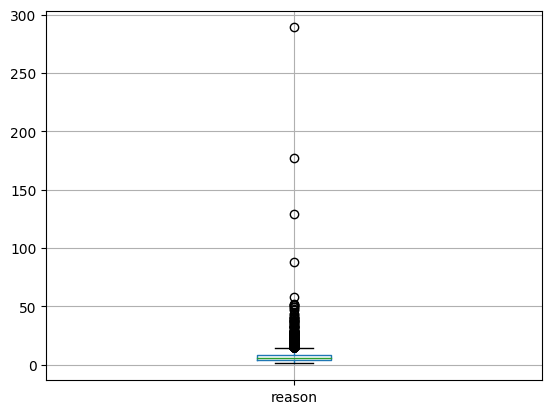

In [ ]:
notifications.groupby("user_id")["reason"].count().reset_index().boxplot()

The middle 50% of users that have received a notification, have 4-8 notifications. The top 25% have above 8, with the max value being 289 (intuitively this is probably a user that frequently engages with the service)

In [ ]:
notifications["reason"].value_counts()

reason
REENGAGEMENT_ACTIVE_FUNDS            28832
PROMO                                18987
NO_INITIAL_CARD_ORDER                 9071
NO_INITIAL_CARD_USE                   9035
INVEST_IN_GOLD                        6649
LOST_CARD_ORDER                       4941
PROMO_CARD_ORDER                      4358
JOINING_ANNIVERSARY                   3334
MADE_MONEY_REQUEST_NOT_SPLIT_BILL     2851
ONBOARDING_TIPS_ACTIVATED_USERS       2423
ENGAGEMENT_SPLIT_BILL_RESTAURANT      1834
BLACK_FRIDAY                          1681
METAL_RESERVE_PLAN                     950
SILVER_ENGAGEMENT_INACTIVE_CARD        896
WELCOME_BACK                           779
BLUE_TUESDAY                           555
SILVER_ENGAGEMENT_FEES_SAVED           528
Name: count, dtype: int64

Most notifications are either for promo or reengagement.

In [ ]:
notifications["channel"].value_counts() # farely balanced between email and push, with sms being the minority

channel
EMAIL    49149
PUSH     46244
SMS       2311
Name: count, dtype: int64

In [ ]:
notifications["status"].value_counts() # majority are sent. We keep the failed as well as the notification failing may provide an indication on churn (for example having deleted the app)

status
SENT      71693
FAILED    26011
Name: count, dtype: int64

# **Devices exploration**

In [ ]:
devices = pd.read_csv("devices.csv")
devices.head()

,brand,user_id
0,Apple,user_0
1,Apple,user_1
2,Apple,user_2
3,Apple,user_3
4,Apple,user_4


In [ ]:
devices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15544 entries, 0 to 15543
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   brand    15544 non-null  object
 1   user_id  15544 non-null  object
dtypes: object(2)
memory usage: 243.0+ KB


In [ ]:
distinct_brand = devices['brand'].unique()
print(distinct_brand)

['Apple' 'Android' 'Unknown']


In [ ]:
print(devices.isnull().sum())

brand      0
user_id    0
dtype: int64


In [ ]:
# doing a value counts which will indicate the type of phone each user has, balanced dataset. We will keep the unknown
devices["brand"].value_counts()

brand
Android    7800
Apple      7712
Unknown      32
Name: count, dtype: int64

<Axes: ylabel='count'>

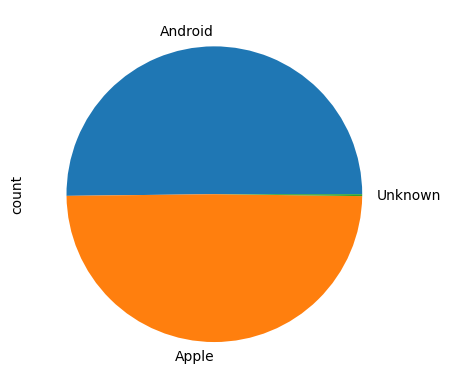

In [ ]:
devices["brand"].value_counts().plot.pie(y="count")

# Identify key relationships

Number of Contacts: Users with a larger number of contacts may be more engaged with the platform's social aspects and less likely to churn.

In [ ]:
min_num_contacts = users['num_contacts'].min();
mean_num_contacts = users['num_contacts'].mean();
max_num_contacts = users['num_contacts'].max();
print('Min number of contacts: {}, mean {}, max {}'.format(min_num_contacts, mean_num_contacts, max_num_contacts));

Min number of contacts: 0, mean 17.87422799794133, max 2918


In [ ]:
quantile_value_least = users['num_contacts'].quantile(0.05)
quantile_value_most = users['num_contacts'].quantile(0.95)

# Filter users who have number of contacts less than or equal to the quantile value
top_5_percent_least_contacts_users = users[users['num_contacts'] <= quantile_value_least]
# Filter users who have number of contacts more than or equal to the quantile value
top_5_percent_most_contacts_users = users[users['num_contacts'] >= quantile_value_most]

print("Users with the least amount of number of contacts (top 5%) with the least having {} and the most {}".format(
    top_5_percent_least_contacts_users['num_contacts'].min(),
    top_5_percent_least_contacts_users['num_contacts'].max()
))

print("Users with the most amount of number of contacts (top 5%) with the least having {} and the most {}".format(
    top_5_percent_most_contacts_users['num_contacts'].min(),
    top_5_percent_most_contacts_users['num_contacts'].max()
))

Users with the least amount of number of contacts (top 5%) with the least having 0 and the most 0
Users with the most amount of number of contacts (top 5%) with the least having 76 and the most 2918


In [ ]:
gold_plan_users = users[users['plan'] == 'GOLD']
silver_plan_users = users[users['plan'] == 'SILVER']
standard_plan_users = users[users['plan'] == 'STANDARD']

min_num_contacts_gold = gold_plan_users['num_contacts'].min();
mean_num_contacts_gold = gold_plan_users['num_contacts'].mean();
max_num_contacts_gold = gold_plan_users['num_contacts'].max();
print('Gold plan users: Min number of contacts: {}, mean {}, max {}'.format(min_num_contacts_gold, mean_num_contacts_gold, max_num_contacts_gold));

min_num_contacts_silver = silver_plan_users['num_contacts'].min();
mean_num_contacts_silver = silver_plan_users['num_contacts'].mean();
max_num_contacts_silver = silver_plan_users['num_contacts'].max();
print('Silver plan users: Min number of contacts: {}, mean {}, max {}'.format(min_num_contacts_silver, mean_num_contacts_silver, max_num_contacts_silver));

min_num_contacts_standard = standard_plan_users['num_contacts'].min();
mean_num_contacts_standard = standard_plan_users['num_contacts'].mean();
max_num_contacts_standard = standard_plan_users['num_contacts'].max();
print('Standard plan users: Min number of contacts: {}, mean {}, max {}'.format(min_num_contacts_standard, mean_num_contacts_standard, max_num_contacts_standard));

Gold plan users: Min number of contacts: 0, mean 36.212814645308924, max 476
Silver plan users: Min number of contacts: 0, mean 20.433380084151473, max 307
Standard plan users: Min number of contacts: 0, mean 17.190704460191746, max 2918


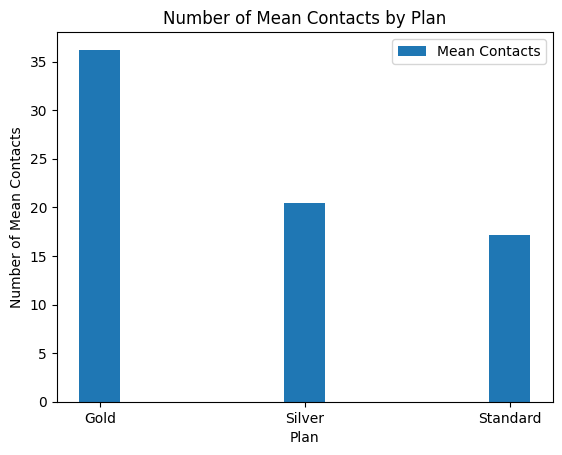

In [ ]:
# Data
plan_names = ['Gold', 'Silver', 'Standard']
mean_contacts = [mean_num_contacts_gold, mean_num_contacts_silver, mean_num_contacts_standard]

# Plotting
x = range(len(plan_names))
width = 0.2

plt.bar([i + width for i in x], mean_contacts, width=width, label='Mean Contacts')

plt.xlabel('Plan')
plt.ylabel('Number of Mean Contacts')
plt.title('Number of Mean Contacts by Plan')
plt.xticks([i + width for i in x], plan_names)
plt.legend()

plt.show()

Having a gold plan usually means they have more contacts, the mean is twice as many as standard users. We see that the more expensive a plan is the more contacts a user has. However there are gold plan users with 0 contacts and Standard plan users with many contacts. Just from these two we can't say if a user is a churn user.

In [ ]:
notification_counts = notifications['user_id'].value_counts()
quantile_value_least = notification_counts.quantile(0.05)
least_notifications_users = notification_counts[notification_counts <= quantile_value_least].index.tolist()
quantile_value_most = notification_counts.quantile(0.95)
most_notifications_users = notification_counts[notification_counts >= quantile_value_most].index.tolist()

print("Users with the least amount of notifications (top 5%):")
print(least_notifications_users)

print("\nUsers with the most amount of notifications (top 5%):")
print(most_notifications_users)

Users with the least amount of notifications (top 5%):
['user_9213', 'user_2967', 'user_10834', 'user_2825', 'user_14726', 'user_13302', 'user_15124', 'user_14330', 'user_11714', 'user_15280', 'user_13403', 'user_3767', 'user_14914', 'user_630', 'user_9277', 'user_7639', 'user_10533', 'user_4666', 'user_11068', 'user_8869', 'user_5639', 'user_494', 'user_14140', 'user_15368', 'user_14440', 'user_9463', 'user_10508', 'user_15486', 'user_9476', 'user_12985', 'user_3471', 'user_13485', 'user_84', 'user_4027', 'user_12707', 'user_11168', 'user_13462', 'user_11712', 'user_1308', 'user_8227', 'user_5972', 'user_6867', 'user_3593', 'user_14407', 'user_6625', 'user_7104', 'user_4984', 'user_14959', 'user_9320', 'user_3842', 'user_13807', 'user_7470', 'user_8607', 'user_1151', 'user_6024', 'user_14471', 'user_12937', 'user_10849', 'user_11979', 'user_739', 'user_11779', 'user_91', 'user_5292', 'user_2392', 'user_5059', 'user_14119', 'user_10784', 'user_2091', 'user_12088', 'user_4410', 'user_48

In [ ]:
#Filter the users with the most notifications and find the num_contacts and plan they have.
filtered_users_most_notifications = users[users['user_id'].isin(most_notifications_users)]

print("Users with the most amount of notifications (top 5%):")
print("They have mean amount of number contacts: {}".format(filtered_users_most_notifications['num_contacts'].mean()))
print("Gold plan user: {}".format(filtered_users_most_notifications[filtered_users_most_notifications['plan'] == 'GOLD'].shape[0]/filtered_users_most_notifications.shape[0]))
print("Silver plan user: {}".format(filtered_users_most_notifications[filtered_users_most_notifications['plan'] == 'SILVER'].shape[0]/filtered_users_most_notifications.shape[0]))
print("Standard plan user: {}".format(filtered_users_most_notifications[filtered_users_most_notifications['plan'] == 'STANDARD'].shape[0]/filtered_users_most_notifications.shape[0]))

#Filter the users with the least notifications and find the num_contacts and plan they have.
filtered_users_least_notifications = users[users['user_id'].isin(least_notifications_users)]

print("Users with the least amount of notifications (top 5%):")
print("They have mean amount of number contacts: {}".format(filtered_users_least_notifications['num_contacts'].mean()))
print("Gold plan user: {}".format(filtered_users_least_notifications[filtered_users_least_notifications['plan'] == 'GOLD'].shape[0]/filtered_users_least_notifications.shape[0]))
print("Silver plan user: {}".format(filtered_users_least_notifications[filtered_users_least_notifications['plan'] == 'SILVER'].shape[0]/filtered_users_least_notifications.shape[0]))
print("Standard plan user: {}".format(filtered_users_least_notifications[filtered_users_least_notifications['plan'] == 'STANDARD'].shape[0]/filtered_users_least_notifications.shape[0]))

Users with the most amount of notifications (top 5%):
They have mean amount of number contacts: 19.813186813186814
Gold plan user: 0.02967032967032967
Silver plan user: 0.13736263736263737
Standard plan user: 0.832967032967033
Users with the least amount of notifications (top 5%):
They have mean amount of number contacts: 12.446270543615677
Gold plan user: 0.01706700379266751
Silver plan user: 0.012642225031605562
Standard plan user: 0.9702907711757269


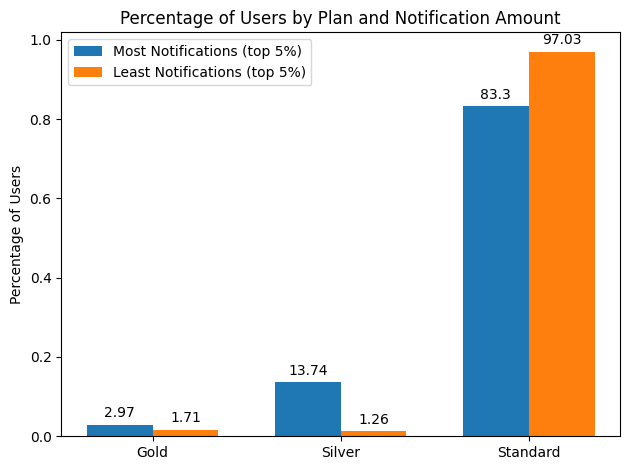

In [ ]:
# Data
plans = ['Gold', 'Silver', 'Standard']
most_notifications_percentage = [
    filtered_users_most_notifications[filtered_users_most_notifications['plan'] == 'GOLD'].shape[0] / filtered_users_most_notifications.shape[0],
    filtered_users_most_notifications[filtered_users_most_notifications['plan'] == 'SILVER'].shape[0] / filtered_users_most_notifications.shape[0],
    filtered_users_most_notifications[filtered_users_most_notifications['plan'] == 'STANDARD'].shape[0] / filtered_users_most_notifications.shape[0]
]
least_notifications_percentage = [
    filtered_users_least_notifications[filtered_users_least_notifications['plan'] == 'GOLD'].shape[0] / filtered_users_least_notifications.shape[0],
    filtered_users_least_notifications[filtered_users_least_notifications['plan'] == 'SILVER'].shape[0] / filtered_users_least_notifications.shape[0],
    filtered_users_least_notifications[filtered_users_least_notifications['plan'] == 'STANDARD'].shape[0] / filtered_users_least_notifications.shape[0]
]

# Plotting
x = np.arange(len(plans))  # Convert x to array
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, most_notifications_percentage, width, label='Most Notifications (top 5%)')
rects2 = ax.bar(x + width/2, least_notifications_percentage, width, label='Least Notifications (top 5%)')

ax.set_ylabel('Percentage of Users')
ax.set_title('Percentage of Users by Plan and Notification Amount')
ax.set_xticks(x)
ax.set_xticklabels(plans)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height*100, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

The more notifications a user has, more likely to have more number contacts and the percentage of having a golden or silver plan is much more.

In [ ]:
transactions_counts = transactions['user_id'].value_counts()
quantile_value_least = transactions_counts.quantile(0.05)
least_transactions_users = transactions_counts[transactions_counts <= quantile_value_least].index.tolist()
quantile_value_most = transactions_counts.quantile(0.95)
most_transactions_users = transactions_counts[transactions_counts >= quantile_value_most].index.tolist()

#Filter the users with the most transactions and find the num_contacts and plan they have.
filtered_users_most_transactions = users[users['user_id'].isin(most_transactions_users)]

print("Users with the most amount of transactions (top 5%):")
print("They have mean amount of number contacts: {}".format(filtered_users_most_transactions['num_contacts'].mean()))
print("Gold plan user: {}".format(filtered_users_most_transactions[filtered_users_most_transactions['plan'] == 'GOLD'].shape[0]/filtered_users_most_transactions.shape[0]))
print("Silver plan user: {}".format(filtered_users_most_transactions[filtered_users_most_transactions['plan'] == 'SILVER'].shape[0]/filtered_users_most_transactions.shape[0]))
print("Standard plan user: {}".format(filtered_users_most_transactions[filtered_users_most_transactions['plan'] == 'STANDARD'].shape[0]/filtered_users_most_transactions.shape[0]))

#Filter the users with the least transactions and find the num_contacts and plan they have.
filtered_users_least_transactions = users[users['user_id'].isin(least_transactions_users)]

print("Users with the least amount of transactions (top 5%):")
print("They have mean amount of number contacts: {}".format(filtered_users_least_transactions['num_contacts'].mean()))
print("Gold plan user: {}".format(filtered_users_least_transactions[filtered_users_least_transactions['plan'] == 'GOLD'].shape[0]/filtered_users_least_transactions.shape[0]))
print("Silver plan user: {}".format(filtered_users_least_transactions[filtered_users_least_transactions['plan'] == 'SILVER'].shape[0]/filtered_users_least_transactions.shape[0]))
print("Standard plan user: {}".format(filtered_users_least_transactions[filtered_users_least_transactions['plan'] == 'STANDARD'].shape[0]/filtered_users_least_transactions.shape[0]))

Users with the most amount of transactions (top 5%):
They have mean amount of number contacts: 29.825565912117177
Gold plan user: 0.21571238348868177
Silver plan user: 0.15446071904127828
Standard plan user: 0.62982689747004
Users with the least amount of transactions (top 5%):
They have mean amount of number contacts: 6.171996542783059
Gold plan user: 0.001728608470181504
Silver plan user: 0.000864304235090752
Standard plan user: 0.9974070872947277


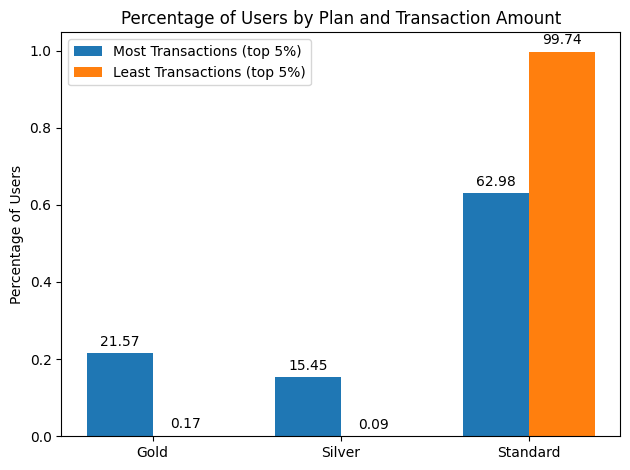

In [ ]:
# Data
plans = ['Gold', 'Silver', 'Standard']
most_transactions_percentage = [
    filtered_users_most_transactions[filtered_users_most_transactions['plan'] == 'GOLD'].shape[0] / filtered_users_most_transactions.shape[0],
    filtered_users_most_transactions[filtered_users_most_transactions['plan'] == 'SILVER'].shape[0] / filtered_users_most_transactions.shape[0],
    filtered_users_most_transactions[filtered_users_most_transactions['plan'] == 'STANDARD'].shape[0] / filtered_users_most_transactions.shape[0]
]
least_transactions_percentage = [
    filtered_users_least_transactions[filtered_users_least_transactions['plan'] == 'GOLD'].shape[0] / filtered_users_least_transactions.shape[0],
    filtered_users_least_transactions[filtered_users_least_transactions['plan'] == 'SILVER'].shape[0] / filtered_users_least_transactions.shape[0],
    filtered_users_least_transactions[filtered_users_least_transactions['plan'] == 'STANDARD'].shape[0] / filtered_users_least_transactions.shape[0]
]

# Plotting
x = np.arange(len(plans))  # Convert x to array
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, most_transactions_percentage, width, label='Most Transactions (top 5%)')
rects2 = ax.bar(x + width/2, least_transactions_percentage, width, label='Least Transactions (top 5%)')

ax.set_ylabel('Percentage of Users')
ax.set_title('Percentage of Users by Plan and Transaction Amount')
ax.set_xticks(x)
ax.set_xticklabels(plans)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height*100, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Again we see the more transactions a user has, more likely to have more number contacts and the percentage of having a golden or silver plan is much more.

In [ ]:
user_transactions = pd.merge(users, transactions_counts, left_on='user_id', right_index=True, how='left')

In [ ]:
user_transactions['count'].max()

3381.0

In [ ]:
# Import necessary libraries
import plotly.graph_objects as go
import pycountry

def featureWorldMap(feature, title):
    '''
    Returns a world heatmap of a given feature
    '''
    # Convert ISO-3166-1 alpha-2 country codes to alpha-3
    iso3_codes = [pycountry.countries.get(alpha_2=code).alpha_3 for code in user_transactions['country']]

    # Define the color scale and its corresponding ranges
    color_scale = [
        [0, "red"],             # 0-5
        [5/3381, "lightcoral"], # 5-20
        [20/3381, "palegreen"], # 20-50
        [50/3381, "green"],     # 30-infinity
        [1, "darkgreen"]
    ]

    # Create the choropleth map figure
    return go.Figure(
        data = {
            'type':'choropleth',
            'locations': iso3_codes,
            'locationmode': 'ISO-3',
            'colorscale': color_scale,
            'z': user_transactions[feature],
            'colorbar': {'title': title},
            'marker': {
                'line': {
                    'color': 'rgb(255,255,255)',
                    'width': 2
                }
            }
        },
        layout = {
            'geo': {
                'scope': 'world',
            }
        }
    )


In [ ]:
featureWorldMap("count", "Number of transactions")

# Cutoff period to define churned users

In [ ]:
# Regarding cutoff_date lets see the spread of frequency users have regarding transaction
transactions.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_4368,2018-04-03 03:34:21.784487
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,OUTBOUND,user_2355,2019-03-19 06:15:59.537032
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,OUTBOUND,user_2355,2019-03-18 18:53:41.323032
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,OUTBOUND,user_2355,2019-03-22 14:20:01.513032
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,OUTBOUND,user_14318,2019-03-22 05:42:50.316652


In [ ]:
transactions.info()
# change created date to be recognized as tstamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181026 entries, 0 to 2181025
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   transaction_id         object        
 1   transactions_type      object        
 2   transactions_currency  object        
 3   amount_usd             float64       
 4   transactions_state     object        
 5   direction              object        
 6   user_id                object        
 7   created_date           datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 133.1+ MB


In [ ]:
transactions["created_date"]=pd.to_datetime(transactions["created_date"])

What is a churned user? We can define it as:

*   Users that have not made a transaction ever (count of transactions = 0)
*   Users with > 0 transactions, but have not made a transaction in x amount of time

Side note: in terms of churned behavior, we do not care about the status of the transaction (failed/ success) as engaging with the application via a transaction even if it failed means the user engaged with the app.

Additionally in terms of churned behavior, we do not care of the direction of the transaction as our aim is predicting if a user will stop using the
company's services. Even in the case of the inbound transaction the user is technically using the company's services.





In [ ]:
max_tr_date_by_userid= transactions.groupby("user_id")["created_date"].max().reset_index() #per user date of most recent transaction by user

In [ ]:
max_tr_date_by_userid.rename(columns={
    "created_date":"most_recent_date"
},inplace=True)
#rename column to most_recent_date

In [ ]:
max_tr_date_by_userid

,user_id,most_recent_date
0,user_0,2019-05-10 17:59:14.524855
1,user_1,2019-05-04 02:30:11.492146
2,user_10,2019-05-11 13:07:42.624413
3,user_100,2019-02-24 13:36:50.054151
4,user_1000,2019-05-05 19:08:42.183644
...,...,...
15007,user_9995,2019-05-01 12:21:34.372843
15008,user_9996,2019-01-08 08:54:44.229756
15009,user_9997,2019-04-27 00:32:53.447857
15010,user_9998,2019-03-15 09:27:13.108571


In [ ]:
cmax_tr_date =transactions["created_date"].max() # date of most recent transaction

In [ ]:
cmax_tr_date

Timestamp('2019-05-16 18:22:16.959896')

In [ ]:
transactions_w_recentdate=transactions.merge(max_tr_date_by_userid,on="user_id")

In [ ]:
max_tr_date_by_userid["days_since_last_transaction"]=max_tr_date_by_userid["most_recent_date"].apply(lambda x: (cmax_tr_date - x).days)

In [ ]:
max_tr_date_by_userid["days_since_last_transaction"].describe()

count    15012.000000
mean        69.689582
std        100.891037
min          0.000000
25%          6.000000
50%         18.000000
75%         92.000000
max        498.000000
Name: days_since_last_transaction, dtype: float64

<Axes: >

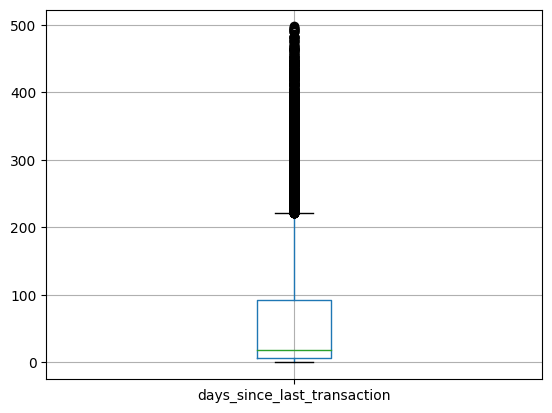

In [ ]:
max_tr_date_by_userid.boxplot(column=["days_since_last_transaction"])

We see that our "lowest" quartile (the quartile with users who have had the greatest amount of days since the last transaction, is >=92 days). Thus we can establish a cutoff point for churned users to be 3 months

Let's also explore the quartile range for each user's days since last transaction belonging to a plan as an extra exploration layer

<Axes: xlabel='plan', ylabel='days_since_last_transaction'>

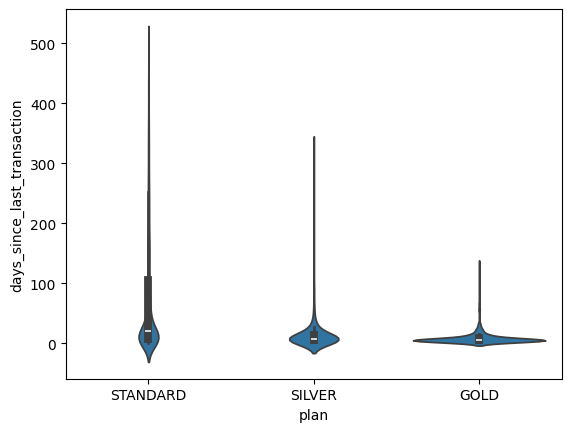

In [ ]:
sns.violinplot(x=users.merge(max_tr_date_by_userid,on="user_id")["plan"],y=users.merge(max_tr_date_by_userid,on="user_id")["days_since_last_transaction"],order=["STANDARD","SILVER","GOLD"])

What we see is that there is a much lower variation of days since last transaction as we move from standard -> silver -> gold. Additionally, there is a higher distribution of users that are closer to 0 the higher the plan, which intuitively tells us that a user that in a higher plan is much less likely to be considered as opted out

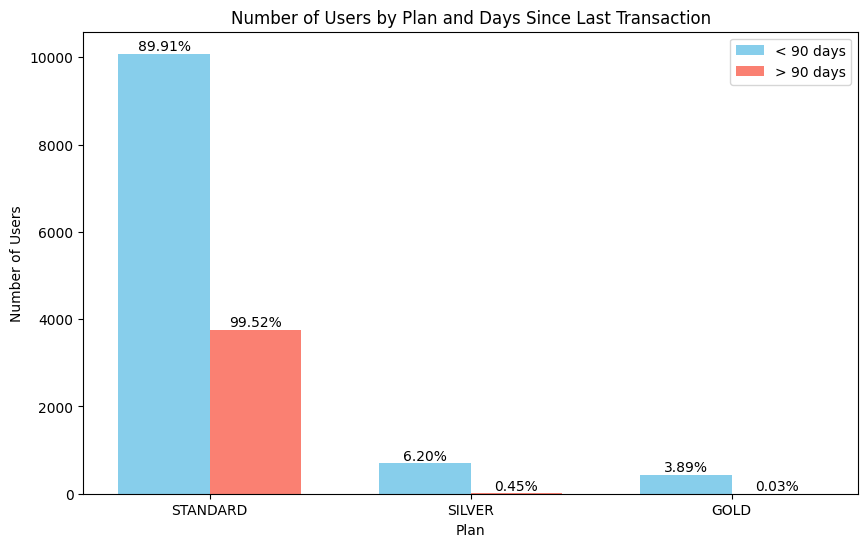

In [ ]:
users_last_transaction_days = users.merge(max_tr_date_by_userid, on="user_id")

# Filter users based on the conditions
users_lt_90 = users_last_transaction_days[users_last_transaction_days["days_since_last_transaction"] < 90]
users_gt_90 = users_last_transaction_days[users_last_transaction_days["days_since_last_transaction"] > 90]

count_lt_90 = users_lt_90["plan"].value_counts()
count_gt_90 = users_gt_90["plan"].value_counts()

# Calculate the total number of users in each group
total_lt_90 = len(users_lt_90)
total_gt_90 = len(users_gt_90)

# Define the width of each bar
bar_width = 0.35

# Define the x positions for the bars
x_lt_90 = np.arange(len(count_lt_90))
x_gt_90 = np.arange(len(count_gt_90)) + bar_width

# Create bar chart
plt.figure(figsize=(10, 6))
bars_lt_90 = plt.bar(x_lt_90, count_lt_90.values, color="skyblue", width=bar_width, label="< 90 days")
bars_gt_90 = plt.bar(x_gt_90, count_gt_90.values, color="salmon", width=bar_width, label="> 90 days")
plt.xlabel("Plan")
plt.ylabel("Number of Users")
plt.title("Number of Users by Plan and Days Since Last Transaction")
plt.xticks(ticks=np.arange(len(count_lt_90)) + bar_width / 2, labels=count_lt_90.index)
plt.legend()

# Add percentage values on top of each bar for < 90 days
def add_percentage_labels_lt_90(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 '{:.2f}%'.format((height / total_lt_90) * 100),
                 ha='center', va='bottom')

# Add percentage values on top of each bar for > 90 days
def add_percentage_labels_gt_90(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 '{:.2f}%'.format((height / total_gt_90) * 100),
                 ha='center', va='bottom')

add_percentage_labels_lt_90(bars_lt_90)
add_percentage_labels_gt_90(bars_gt_90)

plt.show()


<Axes: xlabel='brand', ylabel='days_since_last_transaction'>

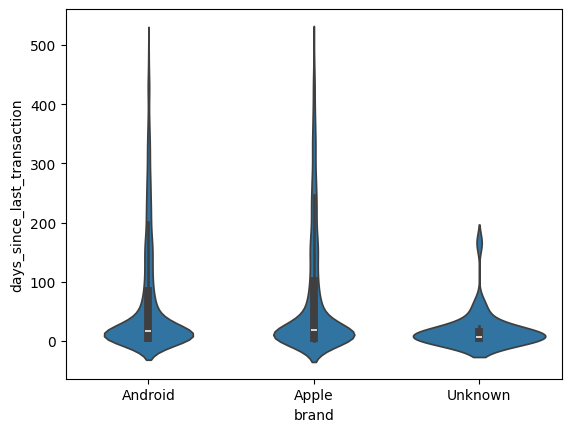

In [ ]:
sns.violinplot(x=devices.merge(max_tr_date_by_userid,on="user_id")["brand"],y=devices.merge(max_tr_date_by_userid,on="user_id")["days_since_last_transaction"],order=["Android","Apple","Unknown"])

What we see is that there is a lower variation of days since last transaction as we move from Android -> Apple -> Unknown. However, the distribution of users is almost the same, which tells us that the device does not tell us if a user will be a churned user.

In [ ]:
# Define the cutoff date, 3 months seems to be enough to say this is a churn user
cutoff_date = pd.to_datetime('2019-02-12')

# Filter users who have not had a transaction after the cutoff date
inactive_users = transactions[transactions['created_date'] <= cutoff_date]['user_id'].unique()

print("Users who have not had a transaction after 2019-04-12:")
print(inactive_users)

Users who have not had a transaction after 2019-04-12:
['user_4368' 'user_15181' 'user_7775' ... 'user_14264' 'user_7928'
 'user_2336']


In [ ]:
max_days_since_last_transaction = users_last_transaction_days['days_since_last_transaction'].max()
print("Maximum number of days since last transaction:", max_days_since_last_transaction)

Maximum number of days since last transaction: 498


In [ ]:
#https://levelup.gitconnected.com/plotting-choropleth-maps-in-python-b74c53b8d0a6
def featureWorldMapDaysSinceLastTransaction(feature, title):
    '''
    Returns a world heatmap of a given feature
    '''
    iso3_codes = [pycountry.countries.get(alpha_2=code).alpha_3 for code in users_last_transaction_days['country']]

    return go.Figure(
        data = {
            'type':'choropleth',
            'locations':iso3_codes,
            'locationmode':'ISO-3',
            'colorscale': [
                [0, "darkgreen"],   # 0-10
                [30/498, "green"],    # 30-60
                [60/498, "palegreen"], # 60-90
                [90/498, "red"], # 90-infinity
                [1, "red"]
            ],
            'z':users_last_transaction_days[feature],
            'colorbar':{'title': title},
            'marker': {
                'line': {
                    'color':'rgb(255,255,255)',
                    'width':2
                }
            }
        },
        layout = {
          'geo':{
              'scope':'world',
          }
        }
    )

In [ ]:
featureWorldMapDaysSinceLastTransaction("days_since_last_transaction", "Days since last transaction")

# **2. Initial preprocessing**

This part will serve to clean the data, bring the tables together, as well as define churned behavior. Lets start with the users_filtered table, which we have already dropped two empty columns from.

### users_filtered

In [ ]:
users_filtered.info()
# rerunning user info, note we can create a new column based on birth_year which will be the user age
# we can create a user_age column based on birth_year
# we can create an age_in_service column based on created date;
# however this will require us to know the timestamp of the latest transaction in the service to be able to use that as a max value (keep a mental note for later)
# we can create a recency of account creation based on created_date, which will count the days of each user based on the most recent created date value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15544 entries, 0 to 15543
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   user_id                                   15544 non-null  object        
 1   birth_year                                15544 non-null  int64         
 2   country                                   15544 non-null  object        
 3   city                                      15544 non-null  object        
 4   created_date                              15544 non-null  datetime64[ns]
 5   user_settings_crypto_unlocked             15544 non-null  int64         
 6   plan                                      15544 non-null  object        
 7   attributes_notifications_marketing_push   10284 non-null  float64       
 8   attributes_notifications_marketing_email  10284 non-null  float64       
 9   num_contacts                

In [ ]:
# Notice that created_date is type object, lets convert it
users_filtered["created_date"]=pd.to_datetime(users_filtered["created_date"])

In [ ]:
# we can also create created_day, created_month, created_ year from created date

In [ ]:
users_filtered["created_day_of_month"]=users_filtered["created_date"].dt.day
users_filtered["created_month_of_year"]=users_filtered["created_date"].dt.month
users_filtered["created_year"]=users_filtered["created_date"].dt.year

In [ ]:
users_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15544 entries, 0 to 15543
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   user_id                                   15544 non-null  object        
 1   birth_year                                15544 non-null  int64         
 2   country                                   15544 non-null  object        
 3   city                                      15544 non-null  object        
 4   created_date                              15544 non-null  datetime64[ns]
 5   user_settings_crypto_unlocked             15544 non-null  int64         
 6   plan                                      15544 non-null  object        
 7   attributes_notifications_marketing_push   10284 non-null  float64       
 8   attributes_notifications_marketing_email  10284 non-null  float64       
 9   num_contacts                

How will we handle the missing values from marketing push and marketing email?
We could use the route of knn imputer, however:
*  with only 15.5K records, and 33% of them missing I'm doubtful of how precise the knn imputer can be
*   there is a low correlation between these two columns and any of the rest columns
*   we do not have a great amount of columns to infer relationships.

As such, I feel imputing the values is not going to be beneficial and I believe the most appropriate course of action is to remove the columns entirely

Additionally, we had both values 1 (indicating enabled) and 0 (indicating disabled) present. If we had only values 1, we could assume that the null values = 0 with a higher likelihood in order to replace the values with 0. However, this is not the case here.

In [ ]:
users_filtered.drop(columns=["attributes_notifications_marketing_push","attributes_notifications_marketing_email"],inplace=True)

In [ ]:
users_filtered.head()

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,num_contacts,created_day_of_month,created_month_of_year,created_year
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,3,10,9,2018
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,75,11,1,2018
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,71,29,11,2018
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,STANDARD,219,17,2,2018
4,user_4,1992,GB,London,2018-01-08 18:40:21.097856,0,STANDARD,0,8,1,2018


In [ ]:
users_filtered.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15544 entries, 0 to 15543
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   user_id                        15544 non-null  object        
 1   birth_year                     15544 non-null  int64         
 2   country                        15544 non-null  object        
 3   city                           15544 non-null  object        
 4   created_date                   15544 non-null  datetime64[ns]
 5   user_settings_crypto_unlocked  15544 non-null  int64         
 6   plan                           15544 non-null  object        
 7   num_contacts                   15544 non-null  int64         
 8   created_day_of_month           15544 non-null  int32         
 9   created_month_of_year          15544 non-null  int32         
 10  created_year                   15544 non-null  int32         
dtypes: datetime64[n

### transactions

In [ ]:
transactions.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_4368,2018-04-03 03:34:21.784487
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,OUTBOUND,user_2355,2019-03-19 06:15:59.537032
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,OUTBOUND,user_2355,2019-03-18 18:53:41.323032
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,OUTBOUND,user_2355,2019-03-22 14:20:01.513032
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,OUTBOUND,user_14318,2019-03-22 05:42:50.316652


In [ ]:
transactions["transactions_state"].unique()

array(['COMPLETED', 'REVERTED', 'DECLINED', 'PENDING', 'FAILED',
       'CANCELLED'], dtype=object)

In [ ]:
transactions["direction"].unique()

array(['OUTBOUND', 'INBOUND'], dtype=object)

In [ ]:
transactions_2 = transactions.copy() # retain original dataframe

In [ ]:
transactions_2_sorted=transactions_2.sort_values(by=["user_id","created_date"],ascending=[True,True]) # we sort the dataframe by user id then by created date
# we are thinking about inserting a transaction logic

In [ ]:
transactions_2_sorted

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,created_date
2048552,transaction_2048552,TOPUP,EUR,0.85,FAILED,INBOUND,user_0,2018-09-10 18:49:34.970855
2055846,transaction_2055846,TOPUP,EUR,0.85,REVERTED,INBOUND,user_0,2018-09-10 18:51:20.218855
1673379,transaction_1673379,TOPUP,EUR,8.51,REVERTED,INBOUND,user_0,2018-09-10 18:52:07.057855
1675109,transaction_1675109,TOPUP,EUR,8.51,COMPLETED,INBOUND,user_0,2018-09-10 18:54:08.965855
1651480,transaction_1651480,TOPUP,EUR,0.85,FAILED,INBOUND,user_0,2018-09-10 19:09:54.750855
...,...,...,...,...,...,...,...,...
2172342,transaction_2172342,TOPUP,EUR,8.51,FAILED,INBOUND,user_9999,2019-05-09 23:01:32.788284
2172344,transaction_2172344,TOPUP,EUR,8.51,FAILED,INBOUND,user_9999,2019-05-09 23:15:29.840284
1937279,transaction_1937279,TOPUP,EUR,8.51,REVERTED,INBOUND,user_9999,2019-05-10 13:56:37.106284
2167040,transaction_2167040,TOPUP,EUR,8.51,FAILED,INBOUND,user_9999,2019-05-10 14:06:25.175284


In [ ]:
# we want to evaluate the balance of the user essentially
# we define a logic regarding the usd amount based on whether it is an inbound or outbound transaction and the state of transaction
# this logic will return the value of amount_usd positive, negative or simply 0
# for example if the transaction is failed or pending, then the balance of the user has not really changed
# if the transaction is complete then the direction of the transaction is respected (inbound means positive amount usd, outbound means negative amount usd)

def amount_calculator_logic(x):
  if x["direction"] == "INBOUND":
    if x["transactions_state"] == "COMPLETED":
      return x["amount_usd"]
    elif x["transactions_state"] == "REVERTED" or x["transactions_state"] == "CANCELLED":
      return 0 - x["amount_usd"]
    else:
      return 0
  elif x["direction"] == "OUTBOUND":
    if x["transactions_state"] == "COMPLETED":
      return 0 - x["amount_usd"]
    elif x["transactions_state"] == "REVERTED" or x["transactions_state"] == "CANCELLED":
      return x["amount_usd"]
    else:
      return 0



In [ ]:
transactions_2["amount_usd_logic"] =transactions_2_sorted.apply(amount_calculator_logic,axis=1) # we apply the function on a new column

In [ ]:
# now we can essentially calculate the balance per user and the count of transactions by user
userid_totalamount= transactions_2.groupby("user_id").agg({
    "amount_usd":np.sum,
    "transaction_id":"count"
}).reset_index().rename(columns={
    "amount_usd":"amount_usd_total",
    "transaction_id": "count_of_transactions"
})

In [ ]:
userid_totalamount
# note the table shows the amount from a user perspective, example user_0's balance negative balance means he has done a greater value of outbound transactions
# now we can add this to the users_filtered table

,user_id,amount_usd_total,count_of_transactions
0,user_0,7122.21,545
1,user_1,14162.08,146
2,user_10,6256.46,143
3,user_100,6344.10,66
4,user_1000,901.62,47
...,...,...,...
15007,user_9995,324.41,8
15008,user_9996,1710.40,37
15009,user_9997,15043.07,146
15010,user_9998,654.38,36


In [ ]:
users_filtered=users_filtered.merge(userid_totalamount,how="left",on="user_id") # mergingon user_id

In [ ]:
users_filtered.shape

(15544, 13)

In [ ]:
users_filtered.head()

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,num_contacts,created_day_of_month,created_month_of_year,created_year,amount_usd_total,count_of_transactions
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,3,10,9,2018,7122.21,545.0
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,75,11,1,2018,14162.08,146.0
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,71,29,11,2018,2983.40,282.0
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,STANDARD,219,17,2,2018,8270.65,158.0
4,user_4,1992,GB,London,2018-01-08 18:40:21.097856,0,STANDARD,0,8,1,2018,1068.40,59.0


In [ ]:
 user_count_transactions_state=pd.crosstab(transactions_2['user_id'], transactions_2['transactions_state']).reset_index()
 # we are essentially counting the types of different transactions per user
 # we have already added the total count of transactions, however this way we have more information on a per user lever, for example the number of failed transactions

In [ ]:
# now its time to merge with the users_filtered
users_filtered=users_filtered.merge(user_count_transactions_state,how="left", on="user_id")

In [ ]:
users_filtered.head(3)

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,num_contacts,created_day_of_month,created_month_of_year,created_year,amount_usd_total,count_of_transactions,CANCELLED,COMPLETED,DECLINED,FAILED,PENDING,REVERTED
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,3,10,9,2018,7122.21,545.0,0.0,520.0,6.0,9.0,2.0,8.0
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,75,11,1,2018,14162.08,146.0,0.0,133.0,6.0,1.0,0.0,6.0
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,71,29,11,2018,2983.40,282.0,0.0,268.0,10.0,2.0,0.0,2.0


In [ ]:
users_filtered.shape

(15544, 19)

In [ ]:
max_tr_date_by_userid.head() # remember our previous table that includes the days_since last transaction?
# we can add the days_since column to our dataframe as well

,user_id,most_recent_date,days_since_last_transaction
0,user_0,2019-05-10 17:59:14.524855,6
1,user_1,2019-05-04 02:30:11.492146,12
2,user_10,2019-05-11 13:07:42.624413,5
3,user_100,2019-02-24 13:36:50.054151,81
4,user_1000,2019-05-05 19:08:42.183644,10


In [ ]:
max_tr_date_by_userid.drop("most_recent_date",axis=1,inplace=True)

In [ ]:
users_filtered=users_filtered.merge(max_tr_date_by_userid,how="left",on="user_id") # merging again

In [ ]:
users_filtered.shape

(15544, 20)

In [ ]:
# another thing we want to do is obtain the latest transaction type, currency, amount usd logic etc for each user
# a way to do it is to make sure we have the df sorted by user id, then by created date in descending order.
# then we assign a rank on a per user id, date level where the most recent date will receive a 1
# we will then filter the dataframe for rank == 1
# we will then merge based on the user id with the users_filtered
transactions_2_sorted=transactions_2.sort_values(by=["user_id","created_date"],ascending=[True,False])
transactions_2_sorted.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,created_date,amount_usd_logic
1671236,transaction_1671236,CARD_PAYMENT,NOK,1.13,PENDING,OUTBOUND,user_0,2019-05-10 17:59:14.524855,0.00
2175669,transaction_2175669,CARD_PAYMENT,EUR,1.66,PENDING,OUTBOUND,user_0,2019-05-10 06:52:45.836855,0.00
1667357,transaction_1667357,CARD_PAYMENT,NOK,2.26,COMPLETED,OUTBOUND,user_0,2019-05-10 05:09:13.868855,-2.26
1667356,transaction_1667356,CARD_PAYMENT,NOK,3.66,COMPLETED,OUTBOUND,user_0,2019-05-10 03:54:12.916855,-3.66
1667348,transaction_1667348,TOPUP,NOK,8.72,COMPLETED,INBOUND,user_0,2019-05-10 03:53:44.042855,8.72


In [ ]:
transactions_2_sorted["rank"]=transactions_2_sorted.groupby("user_id")["created_date"].rank(method="first",ascending=False)
# we create a rank column, groupby user id, and then rank the date assigning a rank 1 to the latest

In [ ]:
per_userid_latest_transactions = transactions_2_sorted[transactions_2_sorted["rank"] == 1] # we filter to get only the rank ==1

In [ ]:
 # we drop the columns transaction_id, amount_usd (since we have amount_usd_logic) and rank
per_userid_latest_transactions=per_userid_latest_transactions.drop(columns=["transaction_id","amount_usd","rank"])

In [ ]:
per_userid_latest_transactions.head()

,transactions_type,transactions_currency,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date,amount_usd_logic
1671236,CARD_PAYMENT,NOK,PENDING,FALSE,5411.0,Oslo,NOR,OUTBOUND,user_0,2019-05-10 17:59:14.524855,0.00
1392123,CARD_PAYMENT,EUR,COMPLETED,FALSE,5541.0,Klaipeda,LTU,OUTBOUND,user_1,2019-05-04 02:30:11.492146,-4.72
1237463,TOPUP,EUR,COMPLETED,NaN,NaN,NaN,NaN,INBOUND,user_10,2019-05-11 13:07:42.624413,42.69
2120656,ATM,EUR,COMPLETED,FALSE,6011.0,Carces E,FRA,OUTBOUND,user_100,2019-02-24 13:36:50.054151,-51.06
17889,TOPUP,SEK,COMPLETED,NaN,NaN,NaN,NaN,INBOUND,user_1000,2019-05-05 19:08:42.183644,15.89


In [ ]:
per_userid_latest_transactions.rename(
    columns={
        "created_date": "last_transaction_date",
        "transactions_type" : "last_transaction_type",
        "transactions_currency" : "last_transaction_currency",
        "transactions_state" : "last_transaction_state",
        "direction" : "last_transaction_direction"
    }
,inplace=True) # give different name to the date column as users_filtered already has a column with that name

In [ ]:
# we can remerge now
users_filtered=users_filtered.merge(per_userid_latest_transactions,how="left",on="user_id")

In [ ]:
users_filtered.info()
# notice that we have missing values, which are the users that did not complete a single transaction

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15544 entries, 0 to 15543
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   user_id                        15544 non-null  object        
 1   birth_year                     15544 non-null  int64         
 2   country                        15544 non-null  object        
 3   city                           15544 non-null  object        
 4   created_date                   15544 non-null  datetime64[ns]
 5   user_settings_crypto_unlocked  15544 non-null  int64         
 6   plan                           15544 non-null  object        
 7   num_contacts                   15544 non-null  int64         
 8   created_day_of_month           15544 non-null  int32         
 9   created_month_of_year          15544 non-null  int32         
 10  created_year                   15544 non-null  int32         
 11  amount_usd_tota

In [ ]:
users_filtered.columns

Index(['user_id', 'birth_year', 'country', 'city', 'created_date',
       'user_settings_crypto_unlocked', 'plan', 'num_contacts',
       'created_day_of_month', 'created_month_of_year', 'created_year',
       'amount_usd_total', 'count_of_transactions', 'CANCELLED', 'COMPLETED',
       'DECLINED', 'FAILED', 'PENDING', 'REVERTED',
       'days_since_last_transaction', 'last_transaction_type',
       'last_transaction_currency', 'last_transaction_state',
       'ea_cardholderpresence', 'ea_merchant_mcc', 'ea_merchant_city',
       'ea_merchant_country', 'last_transaction_direction',
       'last_transaction_date', 'amount_usd_logic'],
      dtype='object')

In [ ]:
# columns - count of transactions until REVERTED can be filled with 0
users_filtered[['count_of_transactions', 'CANCELLED', 'COMPLETED', 'DECLINED', 'FAILED','PENDING', 'REVERTED']]=users_filtered[['count_of_transactions', 'CANCELLED', 'COMPLETED', 'DECLINED', 'FAILED','PENDING', 'REVERTED']].fillna(0)

In [ ]:
users_filtered.info()
# days since last transaction can be given an extremely high value such as 999999
# transaction type -> direction can be given value None
# last transaction date can be given for now the most recent transaction date (we want to create a life in service column based on the difference of last trans date and created_date)
# amount_usd_logic and amount usd total given a 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15544 entries, 0 to 15543
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   user_id                        15544 non-null  object        
 1   birth_year                     15544 non-null  int64         
 2   country                        15544 non-null  object        
 3   city                           15544 non-null  object        
 4   created_date                   15544 non-null  datetime64[ns]
 5   user_settings_crypto_unlocked  15544 non-null  int64         
 6   plan                           15544 non-null  object        
 7   num_contacts                   15544 non-null  int64         
 8   created_day_of_month           15544 non-null  int32         
 9   created_month_of_year          15544 non-null  int32         
 10  created_year                   15544 non-null  int32         
 11  amount_usd_tota

In [ ]:
users_filtered.isnull().sum(axis=0)

user_id                            0
birth_year                         0
country                            0
city                               0
created_date                       0
user_settings_crypto_unlocked      0
plan                               0
num_contacts                       0
created_day_of_month               0
created_month_of_year              0
created_year                       0
amount_usd_total                 532
count_of_transactions              0
CANCELLED                          0
COMPLETED                          0
DECLINED                           0
FAILED                             0
PENDING                            0
REVERTED                           0
days_since_last_transaction      532
last_transaction_type            532
last_transaction_currency        532
last_transaction_state           532
last_transaction_direction       532
last_transaction_date            532
amount_usd_logic                 532
dtype: int64

In [ ]:
(cmax_tr_date - users_filtered["created_date"]).dt.days

In [ ]:
#based on the approach you want comment whichever of those two rows
#users_filtered["days_since_last_transaction"]=users_filtered["days_since_last_transaction"].fillna(999999)
users_filtered["days_since_last_transaction"]=users_filtered["days_since_last_transaction"].fillna((cmax_tr_date - users_filtered["created_date"]).dt.days)

In [ ]:
users_filtered[['last_transaction_type', 'last_transaction_currency', 'last_transaction_state','last_transaction_direction']]=users_filtered[['last_transaction_type', 'last_transaction_currency', 'last_transaction_state','last_transaction_direction']].fillna("None")

In [ ]:
#based on the approach you want comment whichever of those two rows
#users_filtered["last_transaction_date"]=users_filtered["last_transaction_date"].fillna(cmax_tr_date)
users_filtered["last_transaction_date"]=users_filtered["last_transaction_date"].fillna(users_filtered["created_date"])

In [ ]:
users_filtered[["amount_usd_logic","amount_usd_total"]]=users_filtered[["amount_usd_logic","amount_usd_total"]].fillna(0)

In [ ]:
users_filtered.info() # no nulls are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15544 entries, 0 to 15543
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   user_id                        15544 non-null  object        
 1   birth_year                     15544 non-null  int64         
 2   country                        15544 non-null  object        
 3   city                           15544 non-null  object        
 4   created_date                   15544 non-null  datetime64[ns]
 5   user_settings_crypto_unlocked  15544 non-null  int64         
 6   plan                           15544 non-null  object        
 7   num_contacts                   15544 non-null  int64         
 8   created_day_of_month           15544 non-null  int32         
 9   created_month_of_year          15544 non-null  int32         
 10  created_year                   15544 non-null  int32         
 11  amount_usd_tota

In [ ]:
users_filtered["age_in_service"]=(users_filtered["last_transaction_date"] - users_filtered["created_date"]).dt.days

In [ ]:
users_filtered.rename(
    columns={
        "CANCELLED": "num_CANCELLED_transactions",
        "COMPLETED" : "num_COMPLETED_transactions",
        "DECLINED" : "num_DECLINED_transactions",
        "FAILED" : "num_FAILED_transactions",
        "PENDING" : "num_PENDING_transactions",
        "REVERTED" : "num_REVERTED_transactions",
        "amount_usd_logic" : "last_amount_usd_transaction"
    }
,inplace=True)

### notifications

In [ ]:
notifications.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97704 entries, 0 to 97703
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   reason        97704 non-null  object        
 1   channel       97704 non-null  object        
 2   status        97704 non-null  object        
 3   user_id       97704 non-null  object        
 4   created_date  97704 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 3.7+ MB


In [ ]:
notifications # we will get a count of notifications by user, as well as the different counts per reason, channel status on a per user level

,reason,channel,status,user_id,created_date
0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1252,2018-12-02 17:58:33.320645
1,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_12783,2018-12-01 23:09:37.367127
2,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_10244,2018-12-04 02:57:56.425660
3,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_14486,2018-12-14 17:09:58.900808
4,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_28,2018-12-11 12:42:59.718574
...,...,...,...,...,...
97699,LOST_CARD_ORDER,EMAIL,FAILED,user_7488,2019-05-05 11:29:47.645713
97700,LOST_CARD_ORDER,EMAIL,SENT,user_7108,2019-05-06 08:17:29.915656
97701,LOST_CARD_ORDER,EMAIL,FAILED,user_5079,2019-05-06 13:35:51.055711
97702,LOST_CARD_ORDER,EMAIL,SENT,user_4860,2019-05-10 01:25:42.530159


In [ ]:
notif_count_by_user=notifications.groupby("user_id")["status"].count().reset_index().rename(columns={"status":"count of notifications"})

In [ ]:
notif_count_by_user_reason=pd.crosstab(notifications['user_id'], notifications["reason"]).reset_index()

In [ ]:
notif_count_by_user_channel=pd.crosstab(notifications['user_id'], notifications["channel"]).reset_index()

In [ ]:
notif_count_by_user_status=pd.crosstab(notifications['user_id'], notifications["status"]).reset_index()

In [ ]:
# time to merge

users_filtered=users_filtered.merge(notif_count_by_user,how="left",on="user_id")

In [ ]:
users_filtered=users_filtered.merge(notif_count_by_user_reason,how="left",on="user_id")

In [ ]:
users_filtered=users_filtered.merge(notif_count_by_user_channel,how="left",on="user_id")

In [ ]:
users_filtered=users_filtered.merge(notif_count_by_user_status,how="left",on="user_id")

In [ ]:
users_filtered.shape

(15544, 50)

In [ ]:
notifications_sorted=notifications.sort_values(by=["user_id","created_date"],ascending=[True,False])# now we can repeat what we did for transactions, ie get the latest notification per user

In [ ]:
notifications_sorted["rank"]=notifications_sorted.groupby("user_id")["created_date"].rank(method="first",ascending=False)

In [ ]:
notifications_sorted_rank_1=notifications_sorted[notifications_sorted["rank"] == 1]

In [ ]:
notifications_sorted_rank_1.head()

,reason,channel,status,user_id,created_date,rank
88428,INVEST_IN_GOLD,EMAIL,SENT,user_0,2019-02-17 19:48:44.446855,1.0
30609,INVEST_IN_GOLD,EMAIL,FAILED,user_1,2019-02-25 22:14:26.535146,1.0
43466,INVEST_IN_GOLD,EMAIL,SENT,user_10,2019-03-12 09:02:47.273413,1.0
88486,INVEST_IN_GOLD,EMAIL,SENT,user_100,2019-03-02 16:16:18.614151,1.0
51158,NO_INITIAL_CARD_ORDER,EMAIL,SENT,user_1000,2018-03-27 23:21:22.711644,1.0


In [ ]:
notifications_sorted_rank_1=notifications_sorted_rank_1.rename(
    columns={
        "created_date":"latest_notification_date",
        "reason":"latest_notification_reason",
        "channel":"latest_notification_channel",
        "status":"latest_notification_status"
        }
    )

In [ ]:
users_filtered=users_filtered.merge(notifications_sorted_rank_1.iloc[:,:-1],how="left",on="user_id")

In [ ]:
users_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15544 entries, 0 to 15543
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   user_id                            15544 non-null  object        
 1   birth_year                         15544 non-null  int64         
 2   country                            15544 non-null  object        
 3   city                               15544 non-null  object        
 4   created_date                       15544 non-null  datetime64[ns]
 5   user_settings_crypto_unlocked      15544 non-null  int64         
 6   plan                               15544 non-null  object        
 7   num_contacts                       15544 non-null  int64         
 8   created_day_of_month               15544 non-null  int32         
 9   created_month_of_year              15544 non-null  int32         
 10  created_year                      

In [ ]:
users_filtered[['count of notifications',
       'BLACK_FRIDAY', 'BLUE_TUESDAY', 'ENGAGEMENT_SPLIT_BILL_RESTAURANT',
       'INVEST_IN_GOLD', 'JOINING_ANNIVERSARY', 'LOST_CARD_ORDER',
       'MADE_MONEY_REQUEST_NOT_SPLIT_BILL', 'METAL_RESERVE_PLAN',
       'NO_INITIAL_CARD_ORDER', 'NO_INITIAL_CARD_USE',
       'ONBOARDING_TIPS_ACTIVATED_USERS', 'PROMO', 'PROMO_CARD_ORDER',
       'REENGAGEMENT_ACTIVE_FUNDS', 'SILVER_ENGAGEMENT_FEES_SAVED',
       'SILVER_ENGAGEMENT_INACTIVE_CARD', 'WELCOME_BACK', 'EMAIL', 'PUSH',
       'SMS', 'FAILED', 'SENT']] = users_filtered[['count of notifications',
       'BLACK_FRIDAY', 'BLUE_TUESDAY', 'ENGAGEMENT_SPLIT_BILL_RESTAURANT',
       'INVEST_IN_GOLD', 'JOINING_ANNIVERSARY', 'LOST_CARD_ORDER',
       'MADE_MONEY_REQUEST_NOT_SPLIT_BILL', 'METAL_RESERVE_PLAN',
       'NO_INITIAL_CARD_ORDER', 'NO_INITIAL_CARD_USE',
       'ONBOARDING_TIPS_ACTIVATED_USERS', 'PROMO', 'PROMO_CARD_ORDER',
       'REENGAGEMENT_ACTIVE_FUNDS', 'SILVER_ENGAGEMENT_FEES_SAVED',
       'SILVER_ENGAGEMENT_INACTIVE_CARD', 'WELCOME_BACK', 'EMAIL', 'PUSH',
       'SMS', 'FAILED', 'SENT']].fillna(0) #fill these na values with 0

In [ ]:
users_filtered.rename(
    columns={
        "BLACK_FRIDAY":"num_BLACK_FRIDAY_notification",
        "BLUE_TUESDAY":"num_BLUE_TUESDAY_notification",
        "ENGAGEMENT_SPLIT_BILL_RESTAURANT":"num_ENGAGEMENT_SPLIT_BILL_RESTAURANT_notification",
        "INVEST_IN_GOLD":"num_INVEST_IN_GOLD_notification",
        "JOINING_ANNIVERSARY":"num_JOINING_ANNIVERSARY_notification",
        "LOST_CARD_ORDER":"num_LOST_CARD_ORDER_notification",
        "MADE_MONEY_REQUEST_NOT_SPLIT_BILL":"num_MADE_MONEY_REQUEST_NOT_SPLIT_BILL_notification",
        "METAL_RESERVE_PLAN":"num_METAL_RESERVE_PLAN_notification",
        "NO_INITIAL_CARD_ORDER":"num_NO_INITIAL_CARD_ORDER_notification",
        "NO_INITIAL_CARD_USE":"num_NO_INITIAL_CARD_USE_notification",
        "ONBOARDING_TIPS_ACTIVATED_USERS":"num_ONBOARDING_TIPS_ACTIVATED_USERS_notification",
        "PROMO":"num_PROMO_notification",
        "PROMO_CARD_ORDER":"num_PROMO_CARD_ORDER_notification",
        "REENGAGEMENT_ACTIVE_FUNDS":"num_REENGAGEMENT_ACTIVE_FUNDS_notification",
        "SILVER_ENGAGEMENT_FEES_SAVED":"num_SILVER_ENGAGEMENT_FEES_SAVED_notification",
        "SILVER_ENGAGEMENT_INACTIVE_CARD":"num_SILVER_ENGAGEMENT_INACTIVE_CARD_notification",
        "WELCOME_BACK":"num_WELCOME_BACK_notification",
        "EMAIL":"num_EMAIL_notification",
        "PUSH":"num_PUSH_notification",
        "SMS":"num_SMS_notification",
        "FAILED":"num_FAILED_notification",
        "SENT":"num_SENT_notification",
        }
,inplace=True)

In [ ]:
users_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15544 entries, 0 to 15543
Data columns (total 54 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   user_id                                             15544 non-null  object        
 1   birth_year                                          15544 non-null  int64         
 2   country                                             15544 non-null  object        
 3   city                                                15544 non-null  object        
 4   created_date                                        15544 non-null  datetime64[ns]
 5   user_settings_crypto_unlocked                       15544 non-null  int64         
 6   plan                                                15544 non-null  object        
 7   num_contacts                                        15544 non-null  int64         
 8   create

In [ ]:
users_filtered["latest_notification_date"]=pd.to_datetime(users_filtered["latest_notification_date"])

In [ ]:
latest_max_notification_date=users_filtered["latest_notification_date"].max()

In [ ]:
#based on the approach you want comment whichever of those two rows
#users_filtered["latest_notification_date"]=users_filtered["latest_notification_date"].fillna(latest_max_notification_date)
users_filtered["latest_notification_date"]=users_filtered["latest_notification_date"].fillna(users_filtered["created_date"])

In [ ]:
users_filtered.head()

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,num_contacts,created_day_of_month,created_month_of_year,...,WELCOME_BACK,EMAIL,PUSH,SMS,FAILED_y,SENT,reason,channel,status,latest_notification_date
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,3,10,9,...,0.0,6.0,2.0,0.0,0.0,8.0,INVEST_IN_GOLD,EMAIL,SENT,2019-02-17 19:48:44.446855
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,75,11,1,...,0.0,10.0,5.0,0.0,5.0,10.0,INVEST_IN_GOLD,EMAIL,FAILED,2019-02-25 22:14:26.535146
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,71,29,11,...,0.0,2.0,3.0,0.0,0.0,5.0,MADE_MONEY_REQUEST_NOT_SPLIT_BILL,EMAIL,SENT,2019-02-20 05:41:50.301324
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,STANDARD,219,17,2,...,0.0,5.0,6.0,0.0,5.0,6.0,JOINING_ANNIVERSARY,PUSH,SENT,2019-02-17 03:42:30.871664
4,user_4,1992,GB,London,2018-01-08 18:40:21.097856,0,STANDARD,0,8,1,...,0.0,4.0,4.0,0.0,1.0,7.0,INVEST_IN_GOLD,EMAIL,SENT,2019-02-22 15:40:59.361856


In [ ]:
users_filtered.columns

Index(['user_id', 'birth_year', 'country', 'city', 'created_date',
       'user_settings_crypto_unlocked', 'plan', 'num_contacts',
       'created_day_of_month', 'created_month_of_year', 'created_year',
       'amount_usd_total', 'count_of_transactions',
       'num_CANCELLED_transactions', 'num_COMPLETED_transactions',
       'num_DECLINED_transactions', 'num_FAILED_transactions',
       'num_PENDING_transactions', 'num_REVERTED_transactions',
       'days_since_last_transaction', 'last_transaction_type',
       'last_transaction_currency', 'last_transaction_state',
       'last_transaction_direction', 'last_transaction_date',
       'last_amount_usd_transaction', 'age_in_service',
       'count of notifications', 'num_BLACK_FRIDAY_notification',
       'num_BLUE_TUESDAY_notification',
       'num_ENGAGEMENT_SPLIT_BILL_RESTAURANT_notification',
       'num_INVEST_IN_GOLD_notification',
       'num_JOINING_ANNIVERSARY_notification',
       'num_LOST_CARD_ORDER_notification',
       'nu

In [ ]:
users_filtered[['latest_notification_reason', 'latest_notification_channel', 'latest_notification_status']]=users_filtered[['latest_notification_reason', 'latest_notification_channel', 'latest_notification_status']].fillna("None")

In [ ]:
users_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15544 entries, 0 to 15543
Data columns (total 54 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   user_id                                             15544 non-null  object        
 1   birth_year                                          15544 non-null  int64         
 2   country                                             15544 non-null  object        
 3   city                                                15544 non-null  object        
 4   created_date                                        15544 non-null  datetime64[ns]
 5   user_settings_crypto_unlocked                       15544 non-null  int64         
 6   plan                                                15544 non-null  object        
 7   num_contacts                                        15544 non-null  int64         
 8   create

In [ ]:
# create a new column to compare if the latest action was a notification received or a transaction by the user
users_filtered["Is_transactionlatest"]=users_filtered.apply(lambda x: 1 if x["latest_notification_date"] > x["last_transaction_date"] else 0,axis=1)

In [ ]:
users_filtered.head()

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,num_contacts,created_day_of_month,created_month_of_year,...,num_EMAIL_notification,num_PUSH_notification,num_SMS_notification,num_FAILED_notification,num_SENT_notification,latest_notification_reason,latest_notification_channel,latest_notification_status,latest_notification_date,Is_transactionlatest
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,3,10,9,...,6.0,2.0,0.0,0.0,8.0,INVEST_IN_GOLD,EMAIL,SENT,2019-02-17 19:48:44.446855,0
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,75,11,1,...,10.0,5.0,0.0,5.0,10.0,INVEST_IN_GOLD,EMAIL,FAILED,2019-02-25 22:14:26.535146,0
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,71,29,11,...,2.0,3.0,0.0,0.0,5.0,MADE_MONEY_REQUEST_NOT_SPLIT_BILL,EMAIL,SENT,2019-02-20 05:41:50.301324,0
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,STANDARD,219,17,2,...,5.0,6.0,0.0,5.0,6.0,JOINING_ANNIVERSARY,PUSH,SENT,2019-02-17 03:42:30.871664,0
4,user_4,1992,GB,London,2018-01-08 18:40:21.097856,0,STANDARD,0,8,1,...,4.0,4.0,0.0,1.0,7.0,INVEST_IN_GOLD,EMAIL,SENT,2019-02-22 15:40:59.361856,1


In [ ]:
users_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15544 entries, 0 to 15543
Data columns (total 55 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   user_id                                             15544 non-null  object        
 1   birth_year                                          15544 non-null  int64         
 2   country                                             15544 non-null  object        
 3   city                                                15544 non-null  object        
 4   created_date                                        15544 non-null  datetime64[ns]
 5   user_settings_crypto_unlocked                       15544 non-null  int64         
 6   plan                                                15544 non-null  object        
 7   num_contacts                                        15544 non-null  int64         
 8   create

In [ ]:
# create a new column with days between latest notification and transaction
users_filtered["days_bw_transaction_notif"]=abs((users_filtered["latest_notification_date"] - users_filtered["last_transaction_date"]).dt.days)

Notifications merge to users_filtered brand

In [ ]:
devices_2 = devices.copy()

In [ ]:
devices_2.head()

,brand,user_id
0,Apple,user_0
1,Apple,user_1
2,Apple,user_2
3,Apple,user_3
4,Apple,user_4


In [ ]:
users_filtered=users_filtered.merge(devices_2,how="left",on="user_id")

In [ ]:
users_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15544 entries, 0 to 15543
Data columns (total 57 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   user_id                                             15544 non-null  object        
 1   birth_year                                          15544 non-null  int64         
 2   country                                             15544 non-null  object        
 3   city                                                15544 non-null  object        
 4   created_date                                        15544 non-null  datetime64[ns]
 5   user_settings_crypto_unlocked                       15544 non-null  int64         
 6   plan                                                15544 non-null  object        
 7   num_contacts                                        15544 non-null  int64         
 8   create

In [ ]:
final_df = users_filtered.copy() # create a copy of the dataframe before modelling

In [ ]:
final_df # we will examine columns to drop.
# anything with a date will be removed, user_id, as well as city as it has very many values inside which will make it difficult to enocde


,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,num_contacts,created_day_of_month,created_month_of_year,...,num_SMS_notification,num_FAILED_notification,num_SENT_notification,latest_notification_reason,latest_notification_channel,latest_notification_status,latest_notification_date,Is_transactionlatest,days_bw_transaction_notif,brand
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,3,10,9,...,0.0,0.0,8.0,INVEST_IN_GOLD,EMAIL,SENT,2019-02-17 19:48:44.446855,0,82,Apple
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,75,11,1,...,0.0,5.0,10.0,INVEST_IN_GOLD,EMAIL,FAILED,2019-02-25 22:14:26.535146,0,68,Apple
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,71,29,11,...,0.0,0.0,5.0,MADE_MONEY_REQUEST_NOT_SPLIT_BILL,EMAIL,SENT,2019-02-20 05:41:50.301324,0,59,Apple
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,STANDARD,219,17,2,...,0.0,5.0,6.0,JOINING_ANNIVERSARY,PUSH,SENT,2019-02-17 03:42:30.871664,0,83,Apple
4,user_4,1992,GB,London,2018-01-08 18:40:21.097856,0,STANDARD,0,8,1,...,0.0,1.0,7.0,INVEST_IN_GOLD,EMAIL,SENT,2019-02-22 15:40:59.361856,1,37,Apple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,user_15539,1997,PL,Bralin,2018-08-05 05:56:40.787458,0,STANDARD,0,5,8,...,0.0,2.0,3.0,INVEST_IN_GOLD,EMAIL,SENT,2019-03-03 09:48:06.422458,0,56,Android
15540,user_15540,1985,PL,Poznań,2018-03-29 12:19:05.567779,0,STANDARD,0,29,3,...,0.0,2.0,0.0,PROMO,PUSH,FAILED,2019-02-27 11:32:17.509779,1,238,Apple
15541,user_15541,1978,GB,London,2018-07-13 15:56:50.339746,0,STANDARD,16,13,7,...,0.0,1.0,4.0,MADE_MONEY_REQUEST_NOT_SPLIT_BILL,EMAIL,SENT,2019-05-11 04:58:50.520746,0,2,Android
15542,user_15542,1977,IE,Dublin,2018-01-07 15:53:43.719983,0,GOLD,44,7,1,...,0.0,5.0,3.0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,2019-02-04 20:05:58.135983,0,95,Apple


In [ ]:
final_df=final_df.drop(columns=["user_id","city","created_date","latest_notification_date","last_transaction_date"])

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15544 entries, 0 to 15543
Data columns (total 52 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   birth_year                                          15544 non-null  int64  
 1   country                                             15544 non-null  object 
 2   user_settings_crypto_unlocked                       15544 non-null  int64  
 3   plan                                                15544 non-null  object 
 4   num_contacts                                        15544 non-null  int64  
 5   created_day_of_month                                15544 non-null  int32  
 6   created_month_of_year                               15544 non-null  int32  
 7   created_year                                        15544 non-null  int32  
 8   amount_usd_total                                    15544 non-null  float64


Since the objective of the assignment is a churn prediction model, and we have decided to have 3 months without a transaction as the cuttoff point, we will first create our target column to label as "churned" vs "not-churned". We will then delete the days since last transaction column, as we want to be able to predict based on the remaining characteristics the churn risk.

In [ ]:
final_df["Is_Churned"]=final_df.apply(lambda x: 1 if x["days_since_last_transaction"] >=90 else 0,axis=1)

In [ ]:
final_df=final_df.drop("days_since_last_transaction",axis=1)

In [ ]:
pd.set_option('display.max_columns', 60)

In [ ]:
final_df["country"].unique()

array(['ES', 'LT', 'IE', 'GB', 'MT', 'FR', 'RO', 'PL', 'AT', 'IT', 'SI',
       'CZ', 'BE', 'BG', 'GI', 'CH', 'GG', 'CY', 'LV', 'DE', 'SK', 'GR',
       'DK', 'PT', 'LU', 'HR', 'NL', 'NO', 'SE', 'AU', 'IM', 'FI', 'EE',
       'JE', 'HU', 'RE', 'IS', 'GP', 'LI', 'MQ'], dtype=object)

## 3. Encoding and Model Running

In [ ]:
final_df_encoded=pd.get_dummies(final_df,drop_first=True) # one hot encoding categorical variables

In [ ]:
X = final_df_encoded.drop("Is_Churned",axis=1)

y = final_df_encoded["Is_Churned"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y,shuffle=True)
# test size 25% of the sample, stratify = y because of the uneven labels of the y, and shuffle so that we mix the data

In [ ]:
ss = StandardScaler() # importing a standard scaler to fit transform train and transform test

In [ ]:
X_train = pd.DataFrame(ss.fit_transform(X_train),columns=X.columns)

In [ ]:
X_test = pd.DataFrame(ss.transform(X_test),columns = X.columns)

In [ ]:
classifiers = [
          LogisticRegression(class_weight="balanced",max_iter=10000),
          GaussianNB(),RandomForestClassifier(),KNeighborsClassifier()]
          # creating a list named classifiers that will contain 4 different classifiers to test performance.
# class weight balanced

In [ ]:
cv=KFold(n_splits=5) # arbitrary choice of 5 splits for a more fair assesment and save it to the variable cv

In [ ]:
for classifier in tqdm(classifiers):
    classifier.fit(X_train,y_train)
    print(classifier,"Training scores")
    recall_score = cross_val_score(classifier,X_train,y_train,cv=cv,scoring="recall")
    print(classifier, f"Recall score : {round(recall_score.mean(),2)}")
    f1_score = cross_val_score(classifier,X_train,y_train,cv=cv,scoring="f1")
    print(classifier, f"f1 score : {round(f1_score.mean(),2)}")
    baccuracy_score = cross_val_score(classifier,X_train,y_train,cv=cv,scoring="balanced_accuracy")
    print(classifier, f"Balanced accuracy score : {round(baccuracy_score.mean(),2)}")
    print()
    class_pred=classifier.predict(X_test)
    print("Test classification report:")
    print(classification_report(y_test,class_pred))
    print()
    print()

  0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(class_weight='balanced', max_iter=10000) Training scores
LogisticRegression(class_weight='balanced', max_iter=10000) Recall score : 0.99
LogisticRegression(class_weight='balanced', max_iter=10000) f1 score : 0.98


 25%|██▌       | 1/4 [00:05<00:16,  5.46s/it]

LogisticRegression(class_weight='balanced', max_iter=10000) Balanced accuracy score : 0.99

Test classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2804
           1       0.97      0.99      0.98      1082

    accuracy                           0.99      3886
   macro avg       0.98      0.99      0.99      3886
weighted avg       0.99      0.99      0.99      3886



GaussianNB() Training scores
GaussianNB() Recall score : 0.97
GaussianNB() f1 score : 0.59


 50%|█████     | 2/4 [00:06<00:05,  2.64s/it]

GaussianNB() Balanced accuracy score : 0.73

Test classification report:
              precision    recall  f1-score   support

           0       0.98      0.48      0.65      2804
           1       0.42      0.97      0.59      1082

    accuracy                           0.62      3886
   macro avg       0.70      0.73      0.62      3886
weighted avg       0.82      0.62      0.63      3886



RandomForestClassifier() Training scores
RandomForestClassifier() Recall score : 0.93
RandomForestClassifier() f1 score : 0.95


 75%|███████▌  | 3/4 [00:32<00:13, 13.70s/it]

RandomForestClassifier() Balanced accuracy score : 0.96

Test classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2804
           1       0.96      0.93      0.95      1082

    accuracy                           0.97      3886
   macro avg       0.97      0.96      0.96      3886
weighted avg       0.97      0.97      0.97      3886



KNeighborsClassifier() Training scores
KNeighborsClassifier() Recall score : 0.73
KNeighborsClassifier() f1 score : 0.79
KNeighborsClassifier() Balanced accuracy score : 0.84



100%|██████████| 4/4 [00:39<00:00,  9.98s/it]

Test classification report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2804
           1       0.84      0.71      0.77      1082

    accuracy                           0.88      3886
   macro avg       0.87      0.83      0.84      3886
weighted avg       0.88      0.88      0.88      3886





In [ ]:
log_r = LogisticRegression(class_weight="balanced",max_iter=10000)

In [ ]:
log_r.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [ ]:
predictions_regular = log_r.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions_regular))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2804
           1       0.97      0.99      0.98      1082

    accuracy                           0.99      3886
   macro avg       0.98      0.99      0.99      3886
weighted avg       0.99      0.99      0.99      3886



In [ ]:
print(log_r.coef_)

[[-4.92910533e-02  3.58641233e-02 -2.51244600e-01 -8.58061089e-01
  -9.32486541e+00 -1.78016932e+00 -8.26092961e-02 -7.42824848e-03
  -1.24940379e-01 -1.90112744e-02  1.15531066e-01 -5.27971202e-02
  -2.05998904e-01  1.25961391e-01  9.97472197e-03 -1.23732605e+01
  -1.52737809e-02 -7.59579980e-02  5.78673507e-02  5.47992247e-02
  -7.57122933e-03 -9.04262611e-02 -5.88810871e-02  1.13584094e-01
   8.11031547e-02  8.27897205e-02  1.67282071e-01  4.28959749e-02
  -1.53559475e-01  9.23394151e-02 -2.52283672e-01  1.31483968e-01
  -4.86000108e-02 -2.61842168e-01 -1.29435797e-01  1.88917248e-01
  -6.32172638e-02  6.70633899e-02 -1.26525284e-01  1.32717528e+00
   3.48110734e-01 -4.51495733e-02  3.92723850e-03 -6.06701554e-04
  -9.91232623e-02  3.29345607e-02  2.40303433e-01  1.33817957e-01
   5.06322044e-02  4.34220421e-02 -4.59543323e-02  1.47092057e-01
   1.18375399e-01  1.68123518e-01  6.94454840e-02 -1.57470347e-01
  -3.77982246e-02  1.82809272e-01  1.24031012e-01  6.14624680e-02
   7.92257

In [ ]:
importance = log_r.coef_[0]

In [ ]:
logistic_feature_importance=pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": importance
})

In [ ]:
pd.set_option('display.max_rows', 50)

In [ ]:
logistic_feature_importance["Absolute_val_coef"] = logistic_feature_importance["Coefficient"].abs()

In [ ]:
logistic_feature_importance=logistic_feature_importance.sort_values(by="Absolute_val_coef",ascending=False)

In [ ]:
logistic_feature_importance.head(20)

# higher age in service (days between created date and last transaction, stronger influence in reduction in churn)
# the same for the month of the year which is surprising i.e the higher the stronger the influence in churn reduction, could be higher LTV users recruited later on?
# the higher the time between transaction and notification the higher the influence in churn indicating the effect of reactivation via notifications

,Feature,Coefficient,Absolute_val_coef
15,age_in_service,-12.373261,12.373261
4,created_month_of_year,-9.324865,9.324865
5,created_year,-1.780169,1.780169
39,Is_transactionlatest,1.327175,1.327175
3,created_day_of_month,-0.858061,0.858061
152,latest_notification_channel_PUSH,0.701721,0.701721
146,latest_notification_reason_PROMO_CARD_ORDER,0.522224,0.522224
130,last_transaction_state_PENDING,-0.500947,0.500947
137,latest_notification_reason_JOINING_ANNIVERSARY,-0.457117,0.457117
150,latest_notification_reason_WELCOME_BACK,-0.398027,0.398027


Two options available for next iteration ; can train only with top 10-15 columns and can train again using data available for 20 days within the service to prevent leakage for a stronger & more pratical churn prediction model